In [100]:
import numpy as np
import scipy.misc
import imageio
import random
import pandas as pd
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import cv2
import os
import csv
import PIL
from PIL import Image


In [101]:
np.random.seed(1)
names = ["Apple Scab", "Apple Black Rot", "Apple Cedar Apple Rust", "Apple Healthy", "Blueberry Healthy",
         "Cherry Powdery Mildew", "Cherry Healthy", "Corn Cercospora Gray Leaf Spot", "Corn Common Rust",
         "Corn Northern Leaf Blight", "Corn Healthy", "Grape Black Rot", "Grape Esca", "Grape Leaf Blight",
         "Grape Healthy", "Orange Haunglongbing", "Peach Bacterial Spot", "Peach Healthy", "Bell Pepper Bacterial Spot",
         "Bell Pepper Healthy", "Potato Early Blight", "Potato Late Blight", "Potato Healthy", "Raspberry Healthy",
         "Soybean Healthy", "Squash Powdery Mildew", "Strawberry Leaf Scorch", "Strawberry Healthy",
         "Tomato Bacterial Spot", "Tomato Early Blight", "Tomato Late Blight", "Tomato Leaf Mold",
         "Tomato Septoria Leaf Spot", "Tomato Spider Mites", "Tomato Target Spot", "Tomato Yellow Leaf Curl Virus",
         "Tomato Mosaic Virus", "Tomato Healthy"]


In [102]:
base = "E:\\PycharmProjects\\Chameleon\\data\\crowdai\\c_"


In [103]:
images = []
labels = []
for i in range(0, 38):
    for filename in os.listdir(base + str(i)):
        img1 = cv2.imread(base + str(i) + "\\" + filename)
        img1 = cv2.resize(img1, (100, 100), interpolation=cv2.INTER_CUBIC)
        if img1 is not None:
            labels.append(i)
            images.append(img1)
    print(i)



0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


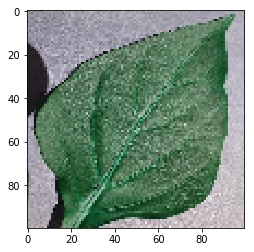

19


In [85]:
plt.imshow(img[0])
plt.show()
print(lab[0])

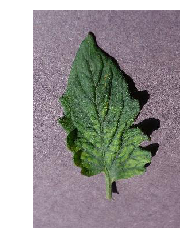

36


In [24]:
p = numpy.random.permutation(len(a))

In [119]:
img = np.array(images)
lab = np.array(labels)
p = np.random.permutation(len(lab))
img = img[p]
lab = lab[p]
lab = lab.reshape(21917, 1)

In [54]:
ma1 = [0, 0, 0]
ma2 = [0, 0, 0]
ma3 = [0, 0, 0]
for i in range(0, 38):
    count = 0
    for filename in os.listdir(base + str(i)):
        count = count + 1
        img = imageio.imread(base + str(i) + "\\" + filename)
        if img is not None:
            temp = np.shape(img)
            if temp[0] > ma1[0]:
                ma1 = temp
            if temp[1] > ma2[1]:
                ma2 = temp
            if temp[2] > ma3[2]:
                ma3 = temp
        if count == 100:
            break
    print(i)


0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21
22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


In [55]:
print(np.shape(img))

(2297, 256, 3)


In [27]:
print(ma2)

(256, 2055, 3)


In [120]:
img = np.reshape(img, (21917, 3, 100, 100))
print(img.shape)

(21917, 3, 100, 100)


In [129]:
num_classes = 38
def train():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 100, 100), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model


model = train()


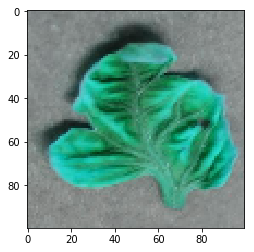

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [127]:
plt.imshow(np.reshape(img[0], (100, 100, 3)))
plt.show()
print(lab[0])

In [122]:
lab = np_utils.to_categorical(lab)
num_classes = lab.shape[1]
K.set_image_dim_ordering('th')
print(np.shape(lab))

(21917, 38)


In [130]:
model.fit(img, lab, epochs=10, batch_size=200)


Epoch 1/10


  200/21917 [..............................] - ETA: 6:37 - loss: 0.4450 - acc: 0.9522

  400/21917 [..............................] - ETA: 3:44 - loss: 0.6296 - acc: 0.9507

  600/21917 [..............................] - ETA: 2:46 - loss: 0.6911 - acc: 0.9502

  800/21917 [>.............................] - ETA: 2:16 - loss: 0.7282 - acc: 0.9496

 1000/21917 [>.............................] - ETA: 1:59 - loss: 0.7479 - acc: 0.9493

 1200/21917 [>.............................] - ETA: 1:47 - loss: 0.7597 - acc: 0.9493

 1400/21917 [>.............................] - ETA: 1:38 - loss: 0.7681 - acc: 0.9492

 1600/21917 [=>............................] - ETA: 1:31 - loss: 0.7765 - acc: 0.9491

 1800/21917 [=>............................] - ETA: 1:26 - loss: 0.7811 - acc: 0.9490

 2000/21917 [=>............................] - ETA: 1:21 - loss: 0.7853 - acc: 0.9490

 2200/21917 [==>...........................] - ETA: 1:18 - loss: 0.7898 - acc: 0.9489

 2400/21917 [==>...........................] - ETA: 1:15 - loss: 0.7922 - acc: 0.9489

 2600/21917 [==>...........................] - ETA: 1:12 - loss: 0.7949 - acc: 0.9489

 2800/21917 [==>...........................] - ETA: 1:10 - loss: 0.7977 - acc: 0.9488

 3000/21917 [===>..........................] - ETA: 1:07 - loss: 0.7994 - acc: 0.9488

 3200/21917 [===>..........................] - ETA: 1:05 - loss: 0.8003 - acc: 0.9488

 3400/21917 [===>..........................] - ETA: 1:04 - loss: 0.8016 - acc: 0.9488

 3600/21917 [===>..........................] - ETA: 1:02 - loss: 0.8023 - acc: 0.9488

 3800/21917 [====>.........................] - ETA: 1:01 - loss: 0.8034 - acc: 0.9488

 4000/21917 [====>.........................] - ETA: 59s - loss: 0.8054 - acc: 0.9488 

 4200/21917 [====>.........................] - ETA: 58s - loss: 0.8058 - acc: 0.9488

 4400/21917 [=====>........................] - ETA: 56s - loss: 0.8070 - acc: 0.9488

 4600/21917 [=====>........................] - ETA: 55s - loss: 0.8075 - acc: 0.9488

 4800/21917 [=====>........................] - ETA: 54s - loss: 0.8085 - acc: 0.9487

 5000/21917 [=====>........................] - ETA: 53s - loss: 0.8090 - acc: 0.9487

 5200/21917 [======>.......................] - ETA: 52s - loss: 0.8097 - acc: 0.9487

 5400/21917 [======>.......................] - ETA: 51s - loss: 0.8102 - acc: 0.9487

 5600/21917 [======>.......................] - ETA: 50s - loss: 0.8111 - acc: 0.9487

 5800/21917 [======>.......................] - ETA: 49s - loss: 0.8115 - acc: 0.9487

 6000/21917 [=======>......................] - ETA: 48s - loss: 0.8114 - acc: 0.9487

 6200/21917 [=======>......................] - ETA: 47s - loss: 0.8123 - acc: 0.9487

 6400/21917 [=======>......................] - ETA: 47s - loss: 0.8130 - acc: 0.9487

 6600/21917 [========>.....................] - ETA: 46s - loss: 0.8126 - acc: 0.9487

 6800/21917 [========>.....................] - ETA: 45s - loss: 0.8130 - acc: 0.9487

 7000/21917 [========>.....................] - ETA: 44s - loss: 0.8118 - acc: 0.9488

 7200/21917 [========>.....................] - ETA: 43s - loss: 0.8106 - acc: 0.9489

 7400/21917 [=========>....................] - ETA: 43s - loss: 0.8090 - acc: 0.9490

 7600/21917 [=========>....................] - ETA: 42s - loss: 0.8087 - acc: 0.9490

 7800/21917 [=========>....................] - ETA: 41s - loss: 0.8081 - acc: 0.9491

 8000/21917 [=========>....................] - ETA: 40s - loss: 0.8066 - acc: 0.9492

 8200/21917 [==========>...................] - ETA: 40s - loss: 0.8061 - acc: 0.9492

 8400/21917 [==========>...................] - ETA: 39s - loss: 0.8044 - acc: 0.9493

 8600/21917 [==========>...................] - ETA: 38s - loss: 0.8034 - acc: 0.9494

 8800/21917 [===========>..................] - ETA: 38s - loss: 0.8026 - acc: 0.9495

 9000/21917 [===========>..................] - ETA: 37s - loss: 0.8017 - acc: 0.9495

 9200/21917 [===========>..................] - ETA: 36s - loss: 0.8016 - acc: 0.9496

 9400/21917 [===========>..................] - ETA: 36s - loss: 0.8013 - acc: 0.9496

 9600/21917 [============>.................] - ETA: 35s - loss: 0.8008 - acc: 0.9496

 9800/21917 [============>.................] - ETA: 34s - loss: 0.8012 - acc: 0.9496

10000/21917 [============>.................] - ETA: 34s - loss: 0.8002 - acc: 0.9497

10200/21917 [============>.................] - ETA: 33s - loss: 0.7995 - acc: 0.9497

10400/21917 [=============>................] - ETA: 32s - loss: 0.7981 - acc: 0.9498

10600/21917 [=============>................] - ETA: 32s - loss: 0.7976 - acc: 0.9499

10800/21917 [=============>................] - ETA: 31s - loss: 0.7966 - acc: 0.9499

11000/21917 [==============>...............] - ETA: 30s - loss: 0.7957 - acc: 0.9500

11200/21917 [==============>...............] - ETA: 30s - loss: 0.7956 - acc: 0.9500

11400/21917 [==============>...............] - ETA: 29s - loss: 0.7952 - acc: 0.9500

11600/21917 [==============>...............] - ETA: 29s - loss: 0.7943 - acc: 0.9501

11800/21917 [===============>..............] - ETA: 28s - loss: 0.7944 - acc: 0.9501

12000/21917 [===============>..............] - ETA: 27s - loss: 0.7936 - acc: 0.9502

12200/21917 [===============>..............] - ETA: 27s - loss: 0.7937 - acc: 0.9502

12400/21917 [===============>..............] - ETA: 26s - loss: 0.7931 - acc: 0.9502

12600/21917 [================>.............] - ETA: 26s - loss: 0.7923 - acc: 0.9503

12800/21917 [================>.............] - ETA: 25s - loss: 0.7924 - acc: 0.9503

13000/21917 [================>.............] - ETA: 24s - loss: 0.7921 - acc: 0.9503

13200/21917 [=================>............] - ETA: 24s - loss: 0.7916 - acc: 0.9503

13400/21917 [=================>............] - ETA: 23s - loss: 0.7917 - acc: 0.9503

13600/21917 [=================>............] - ETA: 23s - loss: 0.7914 - acc: 0.9503

13800/21917 [=================>............] - ETA: 22s - loss: 0.7915 - acc: 0.9503

14000/21917 [==================>...........] - ETA: 21s - loss: 0.7914 - acc: 0.9503

14200/21917 [==================>...........] - ETA: 21s - loss: 0.7911 - acc: 0.9504

14400/21917 [==================>...........] - ETA: 20s - loss: 0.7909 - acc: 0.9504

14600/21917 [==================>...........] - ETA: 20s - loss: 0.7907 - acc: 0.9504

14800/21917 [===================>..........] - ETA: 19s - loss: 0.7907 - acc: 0.9504

15000/21917 [===================>..........] - ETA: 19s - loss: 0.7905 - acc: 0.9504

15200/21917 [===================>..........] - ETA: 18s - loss: 0.7905 - acc: 0.9504

15400/21917 [====================>.........] - ETA: 17s - loss: 0.7906 - acc: 0.9504

15600/21917 [====================>.........] - ETA: 17s - loss: 0.7907 - acc: 0.9504

15800/21917 [====================>.........] - ETA: 16s - loss: 0.7904 - acc: 0.9504

16000/21917 [====================>.........] - ETA: 16s - loss: 0.7901 - acc: 0.9505

16200/21917 [=====================>........] - ETA: 15s - loss: 0.7899 - acc: 0.9505

16400/21917 [=====================>........] - ETA: 15s - loss: 0.7900 - acc: 0.9505

16600/21917 [=====================>........] - ETA: 14s - loss: 0.7896 - acc: 0.9505

16800/21917 [=====================>........] - ETA: 13s - loss: 0.7895 - acc: 0.9505

17000/21917 [======================>.......] - ETA: 13s - loss: 0.7890 - acc: 0.9505

17200/21917 [======================>.......] - ETA: 12s - loss: 0.7888 - acc: 0.9506

17400/21917 [======================>.......] - ETA: 12s - loss: 0.7884 - acc: 0.9506

17600/21917 [=======================>......] - ETA: 11s - loss: 0.7882 - acc: 0.9506

17800/21917 [=======================>......] - ETA: 11s - loss: 0.7881 - acc: 0.9506

18000/21917 [=======================>......] - ETA: 10s - loss: 0.7875 - acc: 0.9507

18200/21917 [=======================>......] - ETA: 10s - loss: 0.7876 - acc: 0.9506

18400/21917 [========================>.....] - ETA: 9s - loss: 0.7875 - acc: 0.9507 

18600/21917 [========================>.....] - ETA: 8s - loss: 0.7873 - acc: 0.9507

18800/21917 [========================>.....] - ETA: 8s - loss: 0.7871 - acc: 0.9507

19000/21917 [=========================>....] - ETA: 7s - loss: 0.7868 - acc: 0.9507

19200/21917 [=========================>....] - ETA: 7s - loss: 0.7865 - acc: 0.9507

19400/21917 [=========================>....] - ETA: 6s - loss: 0.7863 - acc: 0.9507

19600/21917 [=========================>....] - ETA: 6s - loss: 0.7863 - acc: 0.9507

19800/21917 [==========================>...] - ETA: 5s - loss: 0.7860 - acc: 0.9508

20000/21917 [==========================>...] - ETA: 5s - loss: 0.7857 - acc: 0.9508

20200/21917 [==========================>...] - ETA: 4s - loss: 0.7856 - acc: 0.9508

20400/21917 [==========================>...] - ETA: 4s - loss: 0.7857 - acc: 0.9508

20600/21917 [===========================>..] - ETA: 3s - loss: 0.7857 - acc: 0.9508

20800/21917 [===========================>..] - ETA: 3s - loss: 0.7856 - acc: 0.9508

21000/21917 [===========================>..] - ETA: 2s - loss: 0.7852 - acc: 0.9508

21200/21917 [============================>.] - ETA: 1s - loss: 0.7852 - acc: 0.9508

21400/21917 [============================>.] - ETA: 1s - loss: 0.7849 - acc: 0.9509

21600/21917 [============================>.] - ETA: 0s - loss: 0.7846 - acc: 0.9509

21800/21917 [============================>.] - ETA: 0s - loss: 0.7840 - acc: 0.9509

21917/21917 [==============================] - 60s 3ms/step - loss: 0.7839 - acc: 0.9509


Epoch 2/10


  200/21917 [..............................] - ETA: 55s - loss: 0.7635 - acc: 0.9524

  400/21917 [..............................] - ETA: 55s - loss: 0.7657 - acc: 0.9522

  600/21917 [..............................] - ETA: 54s - loss: 0.7635 - acc: 0.9524

  800/21917 [>.............................] - ETA: 54s - loss: 0.7699 - acc: 0.9520

 1000/21917 [>.............................] - ETA: 53s - loss: 0.7661 - acc: 0.9522

 1200/21917 [>.............................] - ETA: 53s - loss: 0.7671 - acc: 0.9521

 1400/21917 [>.............................] - ETA: 52s - loss: 0.7678 - acc: 0.9521

 1600/21917 [=>............................] - ETA: 52s - loss: 0.7699 - acc: 0.9520

 1800/21917 [=>............................] - ETA: 51s - loss: 0.7706 - acc: 0.9519

 2000/21917 [=>............................] - ETA: 51s - loss: 0.7732 - acc: 0.9518

 2200/21917 [==>...........................] - ETA: 50s - loss: 0.7720 - acc: 0.9518

 2400/21917 [==>...........................] - ETA: 50s - loss: 0.7730 - acc: 0.9518

 2600/21917 [==>...........................] - ETA: 49s - loss: 0.7720 - acc: 0.9518

 2800/21917 [==>...........................] - ETA: 48s - loss: 0.7741 - acc: 0.9517

 3000/21917 [===>..........................] - ETA: 48s - loss: 0.7740 - acc: 0.9517

 3200/21917 [===>..........................] - ETA: 47s - loss: 0.7733 - acc: 0.9518

 3400/21917 [===>..........................] - ETA: 47s - loss: 0.7737 - acc: 0.9517

 3600/21917 [===>..........................] - ETA: 46s - loss: 0.7732 - acc: 0.9518

 3800/21917 [====>.........................] - ETA: 46s - loss: 0.7722 - acc: 0.9518

 4000/21917 [====>.........................] - ETA: 45s - loss: 0.7724 - acc: 0.9518

 4200/21917 [====>.........................] - ETA: 45s - loss: 0.7724 - acc: 0.9518

 4400/21917 [=====>........................] - ETA: 44s - loss: 0.7727 - acc: 0.9518

 4600/21917 [=====>........................] - ETA: 44s - loss: 0.7718 - acc: 0.9519

 4800/21917 [=====>........................] - ETA: 43s - loss: 0.7716 - acc: 0.9519

 5000/21917 [=====>........................] - ETA: 43s - loss: 0.7710 - acc: 0.9519

 5200/21917 [======>.......................] - ETA: 42s - loss: 0.7712 - acc: 0.9519

 5400/21917 [======>.......................] - ETA: 42s - loss: 0.7709 - acc: 0.9519

 5600/21917 [======>.......................] - ETA: 41s - loss: 0.7715 - acc: 0.9519

 5800/21917 [======>.......................] - ETA: 41s - loss: 0.7715 - acc: 0.9519

 6000/21917 [=======>......................] - ETA: 40s - loss: 0.7713 - acc: 0.9519

 6200/21917 [=======>......................] - ETA: 40s - loss: 0.7712 - acc: 0.9519

 6400/21917 [=======>......................] - ETA: 39s - loss: 0.7705 - acc: 0.9519

 6600/21917 [========>.....................] - ETA: 39s - loss: 0.7701 - acc: 0.9520

 6800/21917 [========>.....................] - ETA: 38s - loss: 0.7699 - acc: 0.9520

 7000/21917 [========>.....................] - ETA: 38s - loss: 0.7701 - acc: 0.9520

 7200/21917 [========>.....................] - ETA: 37s - loss: 0.7701 - acc: 0.9520

 7400/21917 [=========>....................] - ETA: 37s - loss: 0.7706 - acc: 0.9519

 7600/21917 [=========>....................] - ETA: 36s - loss: 0.7704 - acc: 0.9519

 7800/21917 [=========>....................] - ETA: 36s - loss: 0.7701 - acc: 0.9520

 8000/21917 [=========>....................] - ETA: 35s - loss: 0.7703 - acc: 0.9519

 8200/21917 [==========>...................] - ETA: 35s - loss: 0.7707 - acc: 0.9519

 8400/21917 [==========>...................] - ETA: 34s - loss: 0.7706 - acc: 0.9519

 8600/21917 [==========>...................] - ETA: 34s - loss: 0.7711 - acc: 0.9519

 8800/21917 [===========>..................] - ETA: 33s - loss: 0.7716 - acc: 0.9519

 9000/21917 [===========>..................] - ETA: 33s - loss: 0.7713 - acc: 0.9519

 9200/21917 [===========>..................] - ETA: 32s - loss: 0.7703 - acc: 0.9519

 9400/21917 [===========>..................] - ETA: 32s - loss: 0.7703 - acc: 0.9519

 9600/21917 [============>.................] - ETA: 31s - loss: 0.7706 - acc: 0.9519

 9800/21917 [============>.................] - ETA: 31s - loss: 0.7707 - acc: 0.9519

10000/21917 [============>.................] - ETA: 30s - loss: 0.7706 - acc: 0.9519

10200/21917 [============>.................] - ETA: 30s - loss: 0.7706 - acc: 0.9519

10400/21917 [=============>................] - ETA: 29s - loss: 0.7706 - acc: 0.9519

10600/21917 [=============>................] - ETA: 29s - loss: 0.7708 - acc: 0.9519

10800/21917 [=============>................] - ETA: 28s - loss: 0.7710 - acc: 0.9519

11000/21917 [==============>...............] - ETA: 28s - loss: 0.7710 - acc: 0.9519

11200/21917 [==============>...............] - ETA: 27s - loss: 0.7712 - acc: 0.9519

11400/21917 [==============>...............] - ETA: 27s - loss: 0.7714 - acc: 0.9519

11600/21917 [==============>...............] - ETA: 26s - loss: 0.7709 - acc: 0.9519

11800/21917 [===============>..............] - ETA: 26s - loss: 0.7715 - acc: 0.9519

12000/21917 [===============>..............] - ETA: 25s - loss: 0.7707 - acc: 0.9519

12200/21917 [===============>..............] - ETA: 25s - loss: 0.7700 - acc: 0.9520

12400/21917 [===============>..............] - ETA: 24s - loss: 0.7699 - acc: 0.9520

12600/21917 [================>.............] - ETA: 23s - loss: 0.7704 - acc: 0.9519

12800/21917 [================>.............] - ETA: 23s - loss: 0.7701 - acc: 0.9520

13000/21917 [================>.............] - ETA: 22s - loss: 0.7703 - acc: 0.9519

13200/21917 [=================>............] - ETA: 22s - loss: 0.7703 - acc: 0.9519

13400/21917 [=================>............] - ETA: 21s - loss: 0.7701 - acc: 0.9520

13600/21917 [=================>............] - ETA: 21s - loss: 0.7699 - acc: 0.9520

13800/21917 [=================>............] - ETA: 20s - loss: 0.7695 - acc: 0.9520

14000/21917 [==================>...........] - ETA: 20s - loss: 0.7693 - acc: 0.9520

14200/21917 [==================>...........] - ETA: 19s - loss: 0.7697 - acc: 0.9520

14400/21917 [==================>...........] - ETA: 19s - loss: 0.7700 - acc: 0.9520

14600/21917 [==================>...........] - ETA: 18s - loss: 0.7700 - acc: 0.9520

14800/21917 [===================>..........] - ETA: 18s - loss: 0.7700 - acc: 0.9520

15000/21917 [===================>..........] - ETA: 17s - loss: 0.7697 - acc: 0.9520

15200/21917 [===================>..........] - ETA: 17s - loss: 0.7702 - acc: 0.9520

15400/21917 [====================>.........] - ETA: 16s - loss: 0.7700 - acc: 0.9520

15600/21917 [====================>.........] - ETA: 16s - loss: 0.7702 - acc: 0.9520

15800/21917 [====================>.........] - ETA: 15s - loss: 0.7701 - acc: 0.9520

16000/21917 [====================>.........] - ETA: 15s - loss: 0.7701 - acc: 0.9520

16200/21917 [=====================>........] - ETA: 14s - loss: 0.7698 - acc: 0.9520

16400/21917 [=====================>........] - ETA: 14s - loss: 0.7697 - acc: 0.9520

16600/21917 [=====================>........] - ETA: 13s - loss: 0.7697 - acc: 0.9520

16800/21917 [=====================>........] - ETA: 13s - loss: 0.7695 - acc: 0.9520

17000/21917 [======================>.......] - ETA: 12s - loss: 0.7693 - acc: 0.9520

17200/21917 [======================>.......] - ETA: 12s - loss: 0.7694 - acc: 0.9520

17400/21917 [======================>.......] - ETA: 11s - loss: 0.7693 - acc: 0.9520

17600/21917 [=======================>......] - ETA: 11s - loss: 0.7692 - acc: 0.9520

17800/21917 [=======================>......] - ETA: 10s - loss: 0.7691 - acc: 0.9520

18000/21917 [=======================>......] - ETA: 10s - loss: 0.7690 - acc: 0.9520

18200/21917 [=======================>......] - ETA: 9s - loss: 0.7688 - acc: 0.9520 

18400/21917 [========================>.....] - ETA: 9s - loss: 0.7686 - acc: 0.9521

18600/21917 [========================>.....] - ETA: 8s - loss: 0.7686 - acc: 0.9521

18800/21917 [========================>.....] - ETA: 8s - loss: 0.7687 - acc: 0.9520

19000/21917 [=========================>....] - ETA: 7s - loss: 0.7687 - acc: 0.9520

19200/21917 [=========================>....] - ETA: 6s - loss: 0.7688 - acc: 0.9520

19400/21917 [=========================>....] - ETA: 6s - loss: 0.7689 - acc: 0.9520

19600/21917 [=========================>....] - ETA: 5s - loss: 0.7688 - acc: 0.9520

19800/21917 [==========================>...] - ETA: 5s - loss: 0.7689 - acc: 0.9520

20000/21917 [==========================>...] - ETA: 4s - loss: 0.7691 - acc: 0.9520

20200/21917 [==========================>...] - ETA: 4s - loss: 0.7691 - acc: 0.9520

20400/21917 [==========================>...] - ETA: 3s - loss: 0.7692 - acc: 0.9520

20600/21917 [===========================>..] - ETA: 3s - loss: 0.7691 - acc: 0.9520

20800/21917 [===========================>..] - ETA: 2s - loss: 0.7694 - acc: 0.9520

21000/21917 [===========================>..] - ETA: 2s - loss: 0.7695 - acc: 0.9520

21200/21917 [============================>.] - ETA: 1s - loss: 0.7697 - acc: 0.9520

21400/21917 [============================>.] - ETA: 1s - loss: 0.7700 - acc: 0.9520

21600/21917 [============================>.] - ETA: 0s - loss: 0.7700 - acc: 0.9520

21800/21917 [============================>.] - ETA: 0s - loss: 0.7700 - acc: 0.9520

21917/21917 [==============================] - 56s 3ms/step - loss: 0.7699 - acc: 0.9520


Epoch 3/10


  200/21917 [..............................] - ETA: 56s - loss: 0.7720 - acc: 0.9518

  400/21917 [..............................] - ETA: 55s - loss: 0.7720 - acc: 0.9518

  600/21917 [..............................] - ETA: 55s - loss: 0.7692 - acc: 0.9520

  800/21917 [>.............................] - ETA: 54s - loss: 0.7667 - acc: 0.9522

 1000/21917 [>.............................] - ETA: 53s - loss: 0.7686 - acc: 0.9521

 1200/21917 [>.............................] - ETA: 53s - loss: 0.7706 - acc: 0.9519

 1400/21917 [>.............................] - ETA: 52s - loss: 0.7690 - acc: 0.9520

 1600/21917 [=>............................] - ETA: 52s - loss: 0.7693 - acc: 0.9520

 1800/21917 [=>............................] - ETA: 51s - loss: 0.7720 - acc: 0.9518

 2000/21917 [=>............................] - ETA: 51s - loss: 0.7716 - acc: 0.9519

 2200/21917 [==>...........................] - ETA: 50s - loss: 0.7708 - acc: 0.9519

 2400/21917 [==>...........................] - ETA: 50s - loss: 0.7720 - acc: 0.9518

 2600/21917 [==>...........................] - ETA: 49s - loss: 0.7736 - acc: 0.9517

 2800/21917 [==>...........................] - ETA: 49s - loss: 0.7753 - acc: 0.9516

 3000/21917 [===>..........................] - ETA: 48s - loss: 0.7751 - acc: 0.9516

 3200/21917 [===>..........................] - ETA: 48s - loss: 0.7751 - acc: 0.9516

 3400/21917 [===>..........................] - ETA: 47s - loss: 0.7747 - acc: 0.9517

 3600/21917 [===>..........................] - ETA: 47s - loss: 0.7734 - acc: 0.9518

 3800/21917 [====>.........................] - ETA: 46s - loss: 0.7726 - acc: 0.9518

 4000/21917 [====>.........................] - ETA: 46s - loss: 0.7724 - acc: 0.9518

 4200/21917 [====>.........................] - ETA: 45s - loss: 0.7728 - acc: 0.9518

 4400/21917 [=====>........................] - ETA: 45s - loss: 0.7724 - acc: 0.9518

 4600/21917 [=====>........................] - ETA: 44s - loss: 0.7729 - acc: 0.9518

 4800/21917 [=====>........................] - ETA: 44s - loss: 0.7730 - acc: 0.9518

 5000/21917 [=====>........................] - ETA: 43s - loss: 0.7725 - acc: 0.9518

 5200/21917 [======>.......................] - ETA: 43s - loss: 0.7731 - acc: 0.9518

 5400/21917 [======>.......................] - ETA: 42s - loss: 0.7725 - acc: 0.9518

 5600/21917 [======>.......................] - ETA: 42s - loss: 0.7717 - acc: 0.9519

 5800/21917 [======>.......................] - ETA: 41s - loss: 0.7711 - acc: 0.9519

 6000/21917 [=======>......................] - ETA: 41s - loss: 0.7716 - acc: 0.9519

 6200/21917 [=======>......................] - ETA: 40s - loss: 0.7720 - acc: 0.9518

 6400/21917 [=======>......................] - ETA: 39s - loss: 0.7709 - acc: 0.9519

 6600/21917 [========>.....................] - ETA: 39s - loss: 0.7699 - acc: 0.9520

 6800/21917 [========>.....................] - ETA: 38s - loss: 0.7704 - acc: 0.9519

 7000/21917 [========>.....................] - ETA: 38s - loss: 0.7701 - acc: 0.9520

 7200/21917 [========>.....................] - ETA: 37s - loss: 0.7701 - acc: 0.9520

 7400/21917 [=========>....................] - ETA: 37s - loss: 0.7702 - acc: 0.9520

 7600/21917 [=========>....................] - ETA: 36s - loss: 0.7707 - acc: 0.9519

 7800/21917 [=========>....................] - ETA: 36s - loss: 0.7704 - acc: 0.9519

 8000/21917 [=========>....................] - ETA: 35s - loss: 0.7705 - acc: 0.9519

 8200/21917 [==========>...................] - ETA: 35s - loss: 0.7713 - acc: 0.9519

 8400/21917 [==========>...................] - ETA: 34s - loss: 0.7705 - acc: 0.9519

 8600/21917 [==========>...................] - ETA: 34s - loss: 0.7708 - acc: 0.9519

 8800/21917 [===========>..................] - ETA: 33s - loss: 0.7707 - acc: 0.9519

 9000/21917 [===========>..................] - ETA: 33s - loss: 0.7705 - acc: 0.9519

 9200/21917 [===========>..................] - ETA: 32s - loss: 0.7705 - acc: 0.9519

 9400/21917 [===========>..................] - ETA: 32s - loss: 0.7701 - acc: 0.9520

 9600/21917 [============>.................] - ETA: 31s - loss: 0.7699 - acc: 0.9520

 9800/21917 [============>.................] - ETA: 31s - loss: 0.7702 - acc: 0.9520

10000/21917 [============>.................] - ETA: 30s - loss: 0.7699 - acc: 0.9520

10200/21917 [============>.................] - ETA: 30s - loss: 0.7699 - acc: 0.9520

10400/21917 [=============>................] - ETA: 29s - loss: 0.7695 - acc: 0.9520

10600/21917 [=============>................] - ETA: 29s - loss: 0.7698 - acc: 0.9520

10800/21917 [=============>................] - ETA: 28s - loss: 0.7694 - acc: 0.9520

11000/21917 [==============>...............] - ETA: 28s - loss: 0.7694 - acc: 0.9520

11200/21917 [==============>...............] - ETA: 27s - loss: 0.7691 - acc: 0.9520

11400/21917 [==============>...............] - ETA: 27s - loss: 0.7694 - acc: 0.9520

11600/21917 [==============>...............] - ETA: 26s - loss: 0.7697 - acc: 0.9520

11800/21917 [===============>..............] - ETA: 26s - loss: 0.7700 - acc: 0.9520

12000/21917 [===============>..............] - ETA: 25s - loss: 0.7700 - acc: 0.9520

12200/21917 [===============>..............] - ETA: 25s - loss: 0.7700 - acc: 0.9520

12400/21917 [===============>..............] - ETA: 24s - loss: 0.7697 - acc: 0.9520

12600/21917 [================>.............] - ETA: 24s - loss: 0.7698 - acc: 0.9520

12800/21917 [================>.............] - ETA: 23s - loss: 0.7699 - acc: 0.9520

13000/21917 [================>.............] - ETA: 22s - loss: 0.7695 - acc: 0.9520

13200/21917 [=================>............] - ETA: 22s - loss: 0.7697 - acc: 0.9520

13400/21917 [=================>............] - ETA: 21s - loss: 0.7695 - acc: 0.9520

13600/21917 [=================>............] - ETA: 21s - loss: 0.7697 - acc: 0.9520

13800/21917 [=================>............] - ETA: 20s - loss: 0.7693 - acc: 0.9520

14000/21917 [==================>...........] - ETA: 20s - loss: 0.7690 - acc: 0.9520

14200/21917 [==================>...........] - ETA: 19s - loss: 0.7691 - acc: 0.9520

14400/21917 [==================>...........] - ETA: 19s - loss: 0.7696 - acc: 0.9520

14600/21917 [==================>...........] - ETA: 18s - loss: 0.7696 - acc: 0.9520

14800/21917 [===================>..........] - ETA: 18s - loss: 0.7694 - acc: 0.9520

15000/21917 [===================>..........] - ETA: 17s - loss: 0.7696 - acc: 0.9520

15200/21917 [===================>..........] - ETA: 17s - loss: 0.7697 - acc: 0.9520

15400/21917 [====================>.........] - ETA: 16s - loss: 0.7693 - acc: 0.9520

15600/21917 [====================>.........] - ETA: 16s - loss: 0.7693 - acc: 0.9520

15800/21917 [====================>.........] - ETA: 15s - loss: 0.7694 - acc: 0.9520

16000/21917 [====================>.........] - ETA: 15s - loss: 0.7694 - acc: 0.9520

16200/21917 [=====================>........] - ETA: 14s - loss: 0.7696 - acc: 0.9520

16400/21917 [=====================>........] - ETA: 14s - loss: 0.7696 - acc: 0.9520

16600/21917 [=====================>........] - ETA: 13s - loss: 0.7696 - acc: 0.9520

16800/21917 [=====================>........] - ETA: 13s - loss: 0.7696 - acc: 0.9520

17000/21917 [======================>.......] - ETA: 12s - loss: 0.7695 - acc: 0.9520

17200/21917 [======================>.......] - ETA: 12s - loss: 0.7691 - acc: 0.9520

17400/21917 [======================>.......] - ETA: 11s - loss: 0.7689 - acc: 0.9520

17600/21917 [=======================>......] - ETA: 11s - loss: 0.7692 - acc: 0.9520

17800/21917 [=======================>......] - ETA: 10s - loss: 0.7693 - acc: 0.9520

18000/21917 [=======================>......] - ETA: 10s - loss: 0.7693 - acc: 0.9520

18200/21917 [=======================>......] - ETA: 9s - loss: 0.7693 - acc: 0.9520 

18400/21917 [========================>.....] - ETA: 9s - loss: 0.7697 - acc: 0.9520

18600/21917 [========================>.....] - ETA: 8s - loss: 0.7698 - acc: 0.9520

18800/21917 [========================>.....] - ETA: 8s - loss: 0.7698 - acc: 0.9520

19000/21917 [=========================>....] - ETA: 7s - loss: 0.7703 - acc: 0.9519

19200/21917 [=========================>....] - ETA: 7s - loss: 0.7704 - acc: 0.9519

19400/21917 [=========================>....] - ETA: 6s - loss: 0.7705 - acc: 0.9519

19600/21917 [=========================>....] - ETA: 5s - loss: 0.7704 - acc: 0.9519

19800/21917 [==========================>...] - ETA: 5s - loss: 0.7702 - acc: 0.9520

20000/21917 [==========================>...] - ETA: 4s - loss: 0.7704 - acc: 0.9519

20200/21917 [==========================>...] - ETA: 4s - loss: 0.7700 - acc: 0.9520

20400/21917 [==========================>...] - ETA: 3s - loss: 0.7702 - acc: 0.9520

20600/21917 [===========================>..] - ETA: 3s - loss: 0.7704 - acc: 0.9519

20800/21917 [===========================>..] - ETA: 2s - loss: 0.7704 - acc: 0.9519

21000/21917 [===========================>..] - ETA: 2s - loss: 0.7702 - acc: 0.9520

21200/21917 [============================>.] - ETA: 1s - loss: 0.7702 - acc: 0.9520

21400/21917 [============================>.] - ETA: 1s - loss: 0.7704 - acc: 0.9519

21600/21917 [============================>.] - ETA: 0s - loss: 0.7702 - acc: 0.9520

21800/21917 [============================>.] - ETA: 0s - loss: 0.7700 - acc: 0.9520

21917/21917 [==============================] - 57s 3ms/step - loss: 0.7699 - acc: 0.9520


Epoch 4/10


  200/21917 [..............................] - ETA: 55s - loss: 0.7931 - acc: 0.9505

  400/21917 [..............................] - ETA: 55s - loss: 0.7804 - acc: 0.9513

  600/21917 [..............................] - ETA: 54s - loss: 0.7790 - acc: 0.9514

  800/21917 [>.............................] - ETA: 54s - loss: 0.7773 - acc: 0.9515

 1000/21917 [>.............................] - ETA: 53s - loss: 0.7754 - acc: 0.9516

 1200/21917 [>.............................] - ETA: 53s - loss: 0.7727 - acc: 0.9518

 1400/21917 [>.............................] - ETA: 52s - loss: 0.7732 - acc: 0.9518

 1600/21917 [=>............................] - ETA: 52s - loss: 0.7746 - acc: 0.9517

 1800/21917 [=>............................] - ETA: 51s - loss: 0.7725 - acc: 0.9518

 2000/21917 [=>............................] - ETA: 51s - loss: 0.7695 - acc: 0.9520

 2200/21917 [==>...........................] - ETA: 50s - loss: 0.7704 - acc: 0.9519

 2400/21917 [==>...........................] - ETA: 50s - loss: 0.7695 - acc: 0.9520

 2600/21917 [==>...........................] - ETA: 49s - loss: 0.7697 - acc: 0.9520

 2800/21917 [==>...........................] - ETA: 49s - loss: 0.7714 - acc: 0.9519

 3000/21917 [===>..........................] - ETA: 48s - loss: 0.7700 - acc: 0.9520

 3200/21917 [===>..........................] - ETA: 48s - loss: 0.7709 - acc: 0.9519

 3400/21917 [===>..........................] - ETA: 47s - loss: 0.7717 - acc: 0.9519

 3600/21917 [===>..........................] - ETA: 47s - loss: 0.7706 - acc: 0.9519

 3800/21917 [====>.........................] - ETA: 46s - loss: 0.7702 - acc: 0.9520

 4000/21917 [====>.........................] - ETA: 46s - loss: 0.7713 - acc: 0.9519

 4200/21917 [====>.........................] - ETA: 45s - loss: 0.7714 - acc: 0.9519

 4400/21917 [=====>........................] - ETA: 45s - loss: 0.7712 - acc: 0.9519

 4600/21917 [=====>........................] - ETA: 44s - loss: 0.7722 - acc: 0.9518

 4800/21917 [=====>........................] - ETA: 44s - loss: 0.7706 - acc: 0.9519

 5000/21917 [=====>........................] - ETA: 43s - loss: 0.7706 - acc: 0.9519

 5200/21917 [======>.......................] - ETA: 43s - loss: 0.7705 - acc: 0.9519

 5400/21917 [======>.......................] - ETA: 42s - loss: 0.7701 - acc: 0.9520

 5600/21917 [======>.......................] - ETA: 42s - loss: 0.7705 - acc: 0.9519

 5800/21917 [======>.......................] - ETA: 41s - loss: 0.7702 - acc: 0.9520

 6000/21917 [=======>......................] - ETA: 41s - loss: 0.7711 - acc: 0.9519

 6200/21917 [=======>......................] - ETA: 41s - loss: 0.7705 - acc: 0.9519

 6400/21917 [=======>......................] - ETA: 40s - loss: 0.7704 - acc: 0.9519

 6600/21917 [========>.....................] - ETA: 40s - loss: 0.7710 - acc: 0.9519

 6800/21917 [========>.....................] - ETA: 39s - loss: 0.7715 - acc: 0.9519

 7000/21917 [========>.....................] - ETA: 39s - loss: 0.7714 - acc: 0.9519

 7200/21917 [========>.....................] - ETA: 38s - loss: 0.7706 - acc: 0.9519

 7400/21917 [=========>....................] - ETA: 38s - loss: 0.7706 - acc: 0.9519

 7600/21917 [=========>....................] - ETA: 37s - loss: 0.7707 - acc: 0.9519

 7800/21917 [=========>....................] - ETA: 37s - loss: 0.7710 - acc: 0.9519

 8000/21917 [=========>....................] - ETA: 36s - loss: 0.7710 - acc: 0.9519

 8200/21917 [==========>...................] - ETA: 36s - loss: 0.7712 - acc: 0.9519

 8400/21917 [==========>...................] - ETA: 35s - loss: 0.7709 - acc: 0.9519

 8600/21917 [==========>...................] - ETA: 35s - loss: 0.7703 - acc: 0.9519

 8800/21917 [===========>..................] - ETA: 34s - loss: 0.7703 - acc: 0.9519

 9000/21917 [===========>..................] - ETA: 34s - loss: 0.7697 - acc: 0.9520

 9200/21917 [===========>..................] - ETA: 33s - loss: 0.7697 - acc: 0.9520

 9400/21917 [===========>..................] - ETA: 33s - loss: 0.7702 - acc: 0.9520

 9600/21917 [============>.................] - ETA: 32s - loss: 0.7703 - acc: 0.9519

 9800/21917 [============>.................] - ETA: 32s - loss: 0.7703 - acc: 0.9519

10000/21917 [============>.................] - ETA: 31s - loss: 0.7700 - acc: 0.9520

10200/21917 [============>.................] - ETA: 31s - loss: 0.7709 - acc: 0.9519

10400/21917 [=============>................] - ETA: 30s - loss: 0.7706 - acc: 0.9519

10600/21917 [=============>................] - ETA: 30s - loss: 0.7702 - acc: 0.9520

10800/21917 [=============>................] - ETA: 29s - loss: 0.7696 - acc: 0.9520

11000/21917 [==============>...............] - ETA: 29s - loss: 0.7692 - acc: 0.9520

11200/21917 [==============>...............] - ETA: 28s - loss: 0.7696 - acc: 0.9520

11400/21917 [==============>...............] - ETA: 28s - loss: 0.7699 - acc: 0.9520

11600/21917 [==============>...............] - ETA: 27s - loss: 0.7699 - acc: 0.9520

11800/21917 [===============>..............] - ETA: 27s - loss: 0.7700 - acc: 0.9520

12000/21917 [===============>..............] - ETA: 26s - loss: 0.7699 - acc: 0.9520

12200/21917 [===============>..............] - ETA: 26s - loss: 0.7697 - acc: 0.9520

12400/21917 [===============>..............] - ETA: 25s - loss: 0.7695 - acc: 0.9520

12600/21917 [================>.............] - ETA: 25s - loss: 0.7696 - acc: 0.9520

12800/21917 [================>.............] - ETA: 24s - loss: 0.7693 - acc: 0.9520

13000/21917 [================>.............] - ETA: 24s - loss: 0.7691 - acc: 0.9520

13200/21917 [=================>............] - ETA: 23s - loss: 0.7691 - acc: 0.9520

13400/21917 [=================>............] - ETA: 22s - loss: 0.7694 - acc: 0.9520

13600/21917 [=================>............] - ETA: 22s - loss: 0.7697 - acc: 0.9520

13800/21917 [=================>............] - ETA: 21s - loss: 0.7699 - acc: 0.9520

14000/21917 [==================>...........] - ETA: 21s - loss: 0.7699 - acc: 0.9520

14200/21917 [==================>...........] - ETA: 20s - loss: 0.7701 - acc: 0.9520

14400/21917 [==================>...........] - ETA: 20s - loss: 0.7705 - acc: 0.9519

14600/21917 [==================>...........] - ETA: 19s - loss: 0.7705 - acc: 0.9519

14800/21917 [===================>..........] - ETA: 19s - loss: 0.7705 - acc: 0.9519

15000/21917 [===================>..........] - ETA: 18s - loss: 0.7704 - acc: 0.9519

15200/21917 [===================>..........] - ETA: 18s - loss: 0.7695 - acc: 0.9520

15400/21917 [====================>.........] - ETA: 17s - loss: 0.7696 - acc: 0.9520

15600/21917 [====================>.........] - ETA: 17s - loss: 0.7696 - acc: 0.9520

15800/21917 [====================>.........] - ETA: 16s - loss: 0.7697 - acc: 0.9520

16000/21917 [====================>.........] - ETA: 15s - loss: 0.7698 - acc: 0.9520

16200/21917 [=====================>........] - ETA: 15s - loss: 0.7698 - acc: 0.9520

16400/21917 [=====================>........] - ETA: 14s - loss: 0.7699 - acc: 0.9520

16600/21917 [=====================>........] - ETA: 14s - loss: 0.7696 - acc: 0.9520

16800/21917 [=====================>........] - ETA: 13s - loss: 0.7696 - acc: 0.9520

17000/21917 [======================>.......] - ETA: 13s - loss: 0.7698 - acc: 0.9520

17200/21917 [======================>.......] - ETA: 12s - loss: 0.7696 - acc: 0.9520

17400/21917 [======================>.......] - ETA: 12s - loss: 0.7696 - acc: 0.9520

17600/21917 [=======================>......] - ETA: 11s - loss: 0.7697 - acc: 0.9520

17800/21917 [=======================>......] - ETA: 11s - loss: 0.7698 - acc: 0.9520

18000/21917 [=======================>......] - ETA: 10s - loss: 0.7699 - acc: 0.9520

18200/21917 [=======================>......] - ETA: 9s - loss: 0.7698 - acc: 0.9520 

18400/21917 [========================>.....] - ETA: 9s - loss: 0.7696 - acc: 0.9520

18600/21917 [========================>.....] - ETA: 8s - loss: 0.7697 - acc: 0.9520

18800/21917 [========================>.....] - ETA: 8s - loss: 0.7698 - acc: 0.9520

19000/21917 [=========================>....] - ETA: 7s - loss: 0.7698 - acc: 0.9520

19200/21917 [=========================>....] - ETA: 7s - loss: 0.7697 - acc: 0.9520

19400/21917 [=========================>....] - ETA: 6s - loss: 0.7697 - acc: 0.9520

19600/21917 [=========================>....] - ETA: 6s - loss: 0.7698 - acc: 0.9520

19800/21917 [==========================>...] - ETA: 5s - loss: 0.7698 - acc: 0.9520

20000/21917 [==========================>...] - ETA: 5s - loss: 0.7696 - acc: 0.9520

20200/21917 [==========================>...] - ETA: 4s - loss: 0.7697 - acc: 0.9520

20400/21917 [==========================>...] - ETA: 4s - loss: 0.7697 - acc: 0.9520

20600/21917 [===========================>..] - ETA: 3s - loss: 0.7698 - acc: 0.9520

20800/21917 [===========================>..] - ETA: 2s - loss: 0.7697 - acc: 0.9520

21000/21917 [===========================>..] - ETA: 2s - loss: 0.7699 - acc: 0.9520

21200/21917 [============================>.] - ETA: 1s - loss: 0.7702 - acc: 0.9520

21400/21917 [============================>.] - ETA: 1s - loss: 0.7701 - acc: 0.9520

21600/21917 [============================>.] - ETA: 0s - loss: 0.7699 - acc: 0.9520

21800/21917 [============================>.] - ETA: 0s - loss: 0.7699 - acc: 0.9520

21917/21917 [==============================] - 58s 3ms/step - loss: 0.7699 - acc: 0.9520


Epoch 5/10


  200/21917 [..............................] - ETA: 56s - loss: 0.7889 - acc: 0.9508

  400/21917 [..............................] - ETA: 55s - loss: 0.7889 - acc: 0.9508

  600/21917 [..............................] - ETA: 55s - loss: 0.7846 - acc: 0.9511

  800/21917 [>.............................] - ETA: 54s - loss: 0.7804 - acc: 0.9513

 1000/21917 [>.............................] - ETA: 54s - loss: 0.7762 - acc: 0.9516

 1200/21917 [>.............................] - ETA: 53s - loss: 0.7713 - acc: 0.9519

 1400/21917 [>.............................] - ETA: 53s - loss: 0.7672 - acc: 0.9521

 1600/21917 [=>............................] - ETA: 52s - loss: 0.7699 - acc: 0.9520

 1800/21917 [=>............................] - ETA: 52s - loss: 0.7710 - acc: 0.9519

 2000/21917 [=>............................] - ETA: 51s - loss: 0.7720 - acc: 0.9518

 2200/21917 [==>...........................] - ETA: 51s - loss: 0.7708 - acc: 0.9519

 2400/21917 [==>...........................] - ETA: 50s - loss: 0.7723 - acc: 0.9518

 2600/21917 [==>...........................] - ETA: 50s - loss: 0.7733 - acc: 0.9518

 2800/21917 [==>...........................] - ETA: 49s - loss: 0.7717 - acc: 0.9519

 3000/21917 [===>..........................] - ETA: 49s - loss: 0.7711 - acc: 0.9519

 3200/21917 [===>..........................] - ETA: 48s - loss: 0.7725 - acc: 0.9518

 3400/21917 [===>..........................] - ETA: 48s - loss: 0.7717 - acc: 0.9519

 3600/21917 [===>..........................] - ETA: 47s - loss: 0.7713 - acc: 0.9519

 3800/21917 [====>.........................] - ETA: 47s - loss: 0.7718 - acc: 0.9519

 4000/21917 [====>.........................] - ETA: 46s - loss: 0.7705 - acc: 0.9519

 4200/21917 [====>.........................] - ETA: 46s - loss: 0.7698 - acc: 0.9520

 4400/21917 [=====>........................] - ETA: 45s - loss: 0.7704 - acc: 0.9519

 4600/21917 [=====>........................] - ETA: 45s - loss: 0.7718 - acc: 0.9519

 4800/21917 [=====>........................] - ETA: 44s - loss: 0.7713 - acc: 0.9519

 5000/21917 [=====>........................] - ETA: 44s - loss: 0.7711 - acc: 0.9519

 5200/21917 [======>.......................] - ETA: 43s - loss: 0.7705 - acc: 0.9519

 5400/21917 [======>.......................] - ETA: 42s - loss: 0.7700 - acc: 0.9520

 5600/21917 [======>.......................] - ETA: 42s - loss: 0.7693 - acc: 0.9520

 5800/21917 [======>.......................] - ETA: 41s - loss: 0.7701 - acc: 0.9520

 6000/21917 [=======>......................] - ETA: 41s - loss: 0.7696 - acc: 0.9520

 6200/21917 [=======>......................] - ETA: 40s - loss: 0.7690 - acc: 0.9520

 6400/21917 [=======>......................] - ETA: 40s - loss: 0.7691 - acc: 0.9520

 6600/21917 [========>.....................] - ETA: 39s - loss: 0.7692 - acc: 0.9520

 6800/21917 [========>.....................] - ETA: 39s - loss: 0.7696 - acc: 0.9520

 7000/21917 [========>.....................] - ETA: 38s - loss: 0.7701 - acc: 0.9520

 7200/21917 [========>.....................] - ETA: 38s - loss: 0.7696 - acc: 0.9520

 7400/21917 [=========>....................] - ETA: 37s - loss: 0.7695 - acc: 0.9520

 7600/21917 [=========>....................] - ETA: 37s - loss: 0.7691 - acc: 0.9520

 7800/21917 [=========>....................] - ETA: 36s - loss: 0.7698 - acc: 0.9520

 8000/21917 [=========>....................] - ETA: 36s - loss: 0.7696 - acc: 0.9520

 8200/21917 [==========>...................] - ETA: 35s - loss: 0.7703 - acc: 0.9519

 8400/21917 [==========>...................] - ETA: 35s - loss: 0.7700 - acc: 0.9520

 8600/21917 [==========>...................] - ETA: 34s - loss: 0.7704 - acc: 0.9519

 8800/21917 [===========>..................] - ETA: 34s - loss: 0.7704 - acc: 0.9519

 9000/21917 [===========>..................] - ETA: 33s - loss: 0.7698 - acc: 0.9520

 9200/21917 [===========>..................] - ETA: 33s - loss: 0.7703 - acc: 0.9519

 9400/21917 [===========>..................] - ETA: 32s - loss: 0.7713 - acc: 0.9519

 9600/21917 [============>.................] - ETA: 32s - loss: 0.7711 - acc: 0.9519

 9800/21917 [============>.................] - ETA: 31s - loss: 0.7711 - acc: 0.9519

10000/21917 [============>.................] - ETA: 31s - loss: 0.7708 - acc: 0.9519

10200/21917 [============>.................] - ETA: 30s - loss: 0.7713 - acc: 0.9519

10400/21917 [=============>................] - ETA: 30s - loss: 0.7718 - acc: 0.9519

10600/21917 [=============>................] - ETA: 29s - loss: 0.7719 - acc: 0.9518

10800/21917 [=============>................] - ETA: 29s - loss: 0.7718 - acc: 0.9519

11000/21917 [==============>...............] - ETA: 28s - loss: 0.7718 - acc: 0.9519

11200/21917 [==============>...............] - ETA: 28s - loss: 0.7721 - acc: 0.9518

11400/21917 [==============>...............] - ETA: 27s - loss: 0.7721 - acc: 0.9518

11600/21917 [==============>...............] - ETA: 27s - loss: 0.7721 - acc: 0.9518

11800/21917 [===============>..............] - ETA: 26s - loss: 0.7718 - acc: 0.9519

12000/21917 [===============>..............] - ETA: 26s - loss: 0.7721 - acc: 0.9518

12200/21917 [===============>..............] - ETA: 25s - loss: 0.7723 - acc: 0.9518

12400/21917 [===============>..............] - ETA: 25s - loss: 0.7721 - acc: 0.9518

12600/21917 [================>.............] - ETA: 24s - loss: 0.7724 - acc: 0.9518

12800/21917 [================>.............] - ETA: 24s - loss: 0.7718 - acc: 0.9519

13000/21917 [================>.............] - ETA: 23s - loss: 0.7717 - acc: 0.9519

13200/21917 [=================>............] - ETA: 23s - loss: 0.7712 - acc: 0.9519

13400/21917 [=================>............] - ETA: 22s - loss: 0.7710 - acc: 0.9519

13600/21917 [=================>............] - ETA: 22s - loss: 0.7712 - acc: 0.9519

13800/21917 [=================>............] - ETA: 21s - loss: 0.7709 - acc: 0.9519

14000/21917 [==================>...........] - ETA: 21s - loss: 0.7709 - acc: 0.9519

14200/21917 [==================>...........] - ETA: 20s - loss: 0.7710 - acc: 0.9519

14400/21917 [==================>...........] - ETA: 20s - loss: 0.7709 - acc: 0.9519

14600/21917 [==================>...........] - ETA: 19s - loss: 0.7705 - acc: 0.9519

14800/21917 [===================>..........] - ETA: 19s - loss: 0.7703 - acc: 0.9519

15000/21917 [===================>..........] - ETA: 18s - loss: 0.7704 - acc: 0.9519

15200/21917 [===================>..........] - ETA: 18s - loss: 0.7704 - acc: 0.9519

15400/21917 [====================>.........] - ETA: 17s - loss: 0.7704 - acc: 0.9519

15600/21917 [====================>.........] - ETA: 17s - loss: 0.7700 - acc: 0.9520

15800/21917 [====================>.........] - ETA: 16s - loss: 0.7696 - acc: 0.9520

16000/21917 [====================>.........] - ETA: 15s - loss: 0.7698 - acc: 0.9520

16200/21917 [=====================>........] - ETA: 15s - loss: 0.7701 - acc: 0.9520

16400/21917 [=====================>........] - ETA: 14s - loss: 0.7701 - acc: 0.9520

16600/21917 [=====================>........] - ETA: 14s - loss: 0.7701 - acc: 0.9520

16800/21917 [=====================>........] - ETA: 13s - loss: 0.7700 - acc: 0.9520

17000/21917 [======================>.......] - ETA: 13s - loss: 0.7702 - acc: 0.9520

17200/21917 [======================>.......] - ETA: 12s - loss: 0.7702 - acc: 0.9520

17400/21917 [======================>.......] - ETA: 12s - loss: 0.7698 - acc: 0.9520

17600/21917 [=======================>......] - ETA: 11s - loss: 0.7697 - acc: 0.9520

17800/21917 [=======================>......] - ETA: 11s - loss: 0.7697 - acc: 0.9520

18000/21917 [=======================>......] - ETA: 10s - loss: 0.7697 - acc: 0.9520

18200/21917 [=======================>......] - ETA: 10s - loss: 0.7697 - acc: 0.9520

18400/21917 [========================>.....] - ETA: 9s - loss: 0.7696 - acc: 0.9520 

18600/21917 [========================>.....] - ETA: 8s - loss: 0.7696 - acc: 0.9520

18800/21917 [========================>.....] - ETA: 8s - loss: 0.7701 - acc: 0.9520

19000/21917 [=========================>....] - ETA: 7s - loss: 0.7701 - acc: 0.9520

19200/21917 [=========================>....] - ETA: 7s - loss: 0.7702 - acc: 0.9520

19400/21917 [=========================>....] - ETA: 6s - loss: 0.7704 - acc: 0.9519

19600/21917 [=========================>....] - ETA: 6s - loss: 0.7706 - acc: 0.9519

19800/21917 [==========================>...] - ETA: 5s - loss: 0.7704 - acc: 0.9519

20000/21917 [==========================>...] - ETA: 5s - loss: 0.7705 - acc: 0.9519

20200/21917 [==========================>...] - ETA: 4s - loss: 0.7706 - acc: 0.9519

20400/21917 [==========================>...] - ETA: 4s - loss: 0.7706 - acc: 0.9519

20600/21917 [===========================>..] - ETA: 3s - loss: 0.7703 - acc: 0.9519

20800/21917 [===========================>..] - ETA: 3s - loss: 0.7702 - acc: 0.9520

21000/21917 [===========================>..] - ETA: 2s - loss: 0.7701 - acc: 0.9520

21200/21917 [============================>.] - ETA: 1s - loss: 0.7700 - acc: 0.9520

21400/21917 [============================>.] - ETA: 1s - loss: 0.7698 - acc: 0.9520

21600/21917 [============================>.] - ETA: 0s - loss: 0.7697 - acc: 0.9520

21800/21917 [============================>.] - ETA: 0s - loss: 0.7699 - acc: 0.9520

21917/21917 [==============================] - 59s 3ms/step - loss: 0.7699 - acc: 0.9520


Epoch 6/10


  200/21917 [..............................] - ETA: 58s - loss: 0.7635 - acc: 0.9524

  400/21917 [..............................] - ETA: 56s - loss: 0.7867 - acc: 0.9509

  600/21917 [..............................] - ETA: 55s - loss: 0.7832 - acc: 0.9511

  800/21917 [>.............................] - ETA: 55s - loss: 0.7773 - acc: 0.9515

 1000/21917 [>.............................] - ETA: 54s - loss: 0.7754 - acc: 0.9516

 1200/21917 [>.............................] - ETA: 53s - loss: 0.7706 - acc: 0.9519

 1400/21917 [>.............................] - ETA: 53s - loss: 0.7738 - acc: 0.9517

 1600/21917 [=>............................] - ETA: 52s - loss: 0.7709 - acc: 0.9519

 1800/21917 [=>............................] - ETA: 52s - loss: 0.7701 - acc: 0.9520

 2000/21917 [=>............................] - ETA: 51s - loss: 0.7682 - acc: 0.9521

 2200/21917 [==>...........................] - ETA: 51s - loss: 0.7704 - acc: 0.9519

 2400/21917 [==>...........................] - ETA: 50s - loss: 0.7685 - acc: 0.9521

 2600/21917 [==>...........................] - ETA: 50s - loss: 0.7691 - acc: 0.9520

 2800/21917 [==>...........................] - ETA: 49s - loss: 0.7687 - acc: 0.9520

 3000/21917 [===>..........................] - ETA: 49s - loss: 0.7678 - acc: 0.9521

 3200/21917 [===>..........................] - ETA: 48s - loss: 0.7686 - acc: 0.9521

 3400/21917 [===>..........................] - ETA: 48s - loss: 0.7675 - acc: 0.9521

 3600/21917 [===>..........................] - ETA: 47s - loss: 0.7685 - acc: 0.9521

 3800/21917 [====>.........................] - ETA: 47s - loss: 0.7678 - acc: 0.9521

 4000/21917 [====>.........................] - ETA: 46s - loss: 0.7686 - acc: 0.9521

 4200/21917 [====>.........................] - ETA: 46s - loss: 0.7698 - acc: 0.9520

 4400/21917 [=====>........................] - ETA: 45s - loss: 0.7681 - acc: 0.9521

 4600/21917 [=====>........................] - ETA: 45s - loss: 0.7683 - acc: 0.9521

 4800/21917 [=====>........................] - ETA: 44s - loss: 0.7676 - acc: 0.9521

 5000/21917 [=====>........................] - ETA: 43s - loss: 0.7691 - acc: 0.9520

 5200/21917 [======>.......................] - ETA: 43s - loss: 0.7695 - acc: 0.9520

 5400/21917 [======>.......................] - ETA: 42s - loss: 0.7706 - acc: 0.9519

 5600/21917 [======>.......................] - ETA: 42s - loss: 0.7709 - acc: 0.9519

 5800/21917 [======>.......................] - ETA: 41s - loss: 0.7714 - acc: 0.9519

 6000/21917 [=======>......................] - ETA: 41s - loss: 0.7713 - acc: 0.9519

 6200/21917 [=======>......................] - ETA: 40s - loss: 0.7716 - acc: 0.9519

 6400/21917 [=======>......................] - ETA: 40s - loss: 0.7716 - acc: 0.9519

 6600/21917 [========>.....................] - ETA: 39s - loss: 0.7715 - acc: 0.9519

 6800/21917 [========>.....................] - ETA: 39s - loss: 0.7711 - acc: 0.9519

 7000/21917 [========>.....................] - ETA: 38s - loss: 0.7711 - acc: 0.9519

 7200/21917 [========>.....................] - ETA: 38s - loss: 0.7713 - acc: 0.9519

 7400/21917 [=========>....................] - ETA: 37s - loss: 0.7714 - acc: 0.9519

 7600/21917 [=========>....................] - ETA: 37s - loss: 0.7712 - acc: 0.9519

 7800/21917 [=========>....................] - ETA: 36s - loss: 0.7713 - acc: 0.9519

 8000/21917 [=========>....................] - ETA: 36s - loss: 0.7706 - acc: 0.9519

 8200/21917 [==========>...................] - ETA: 35s - loss: 0.7707 - acc: 0.9519

 8400/21917 [==========>...................] - ETA: 35s - loss: 0.7707 - acc: 0.9519

 8600/21917 [==========>...................] - ETA: 34s - loss: 0.7707 - acc: 0.9519

 8800/21917 [===========>..................] - ETA: 34s - loss: 0.7704 - acc: 0.9519

 9000/21917 [===========>..................] - ETA: 33s - loss: 0.7709 - acc: 0.9519

 9200/21917 [===========>..................] - ETA: 33s - loss: 0.7707 - acc: 0.9519

 9400/21917 [===========>..................] - ETA: 32s - loss: 0.7705 - acc: 0.9519

 9600/21917 [============>.................] - ETA: 32s - loss: 0.7708 - acc: 0.9519

 9800/21917 [============>.................] - ETA: 31s - loss: 0.7704 - acc: 0.9519

10000/21917 [============>.................] - ETA: 31s - loss: 0.7706 - acc: 0.9519

10200/21917 [============>.................] - ETA: 30s - loss: 0.7707 - acc: 0.9519

10400/21917 [=============>................] - ETA: 30s - loss: 0.7706 - acc: 0.9519

10600/21917 [=============>................] - ETA: 29s - loss: 0.7705 - acc: 0.9519

10800/21917 [=============>................] - ETA: 29s - loss: 0.7698 - acc: 0.9520

11000/21917 [==============>...............] - ETA: 28s - loss: 0.7697 - acc: 0.9520

11200/21917 [==============>...............] - ETA: 28s - loss: 0.7698 - acc: 0.9520

11400/21917 [==============>...............] - ETA: 27s - loss: 0.7705 - acc: 0.9519

11600/21917 [==============>...............] - ETA: 26s - loss: 0.7705 - acc: 0.9519

11800/21917 [===============>..............] - ETA: 26s - loss: 0.7703 - acc: 0.9519

12000/21917 [===============>..............] - ETA: 25s - loss: 0.7698 - acc: 0.9520

12200/21917 [===============>..............] - ETA: 25s - loss: 0.7698 - acc: 0.9520

12400/21917 [===============>..............] - ETA: 24s - loss: 0.7698 - acc: 0.9520

12600/21917 [================>.............] - ETA: 24s - loss: 0.7696 - acc: 0.9520

12800/21917 [================>.............] - ETA: 23s - loss: 0.7697 - acc: 0.9520

13000/21917 [================>.............] - ETA: 23s - loss: 0.7696 - acc: 0.9520

13200/21917 [=================>............] - ETA: 22s - loss: 0.7697 - acc: 0.9520

13400/21917 [=================>............] - ETA: 22s - loss: 0.7698 - acc: 0.9520

13600/21917 [=================>............] - ETA: 21s - loss: 0.7699 - acc: 0.9520

13800/21917 [=================>............] - ETA: 21s - loss: 0.7703 - acc: 0.9519

14000/21917 [==================>...........] - ETA: 20s - loss: 0.7704 - acc: 0.9519

14200/21917 [==================>...........] - ETA: 20s - loss: 0.7706 - acc: 0.9519

14400/21917 [==================>...........] - ETA: 19s - loss: 0.7703 - acc: 0.9519

14600/21917 [==================>...........] - ETA: 19s - loss: 0.7706 - acc: 0.9519

14800/21917 [===================>..........] - ETA: 18s - loss: 0.7703 - acc: 0.9519

15000/21917 [===================>..........] - ETA: 18s - loss: 0.7706 - acc: 0.9519

15200/21917 [===================>..........] - ETA: 17s - loss: 0.7705 - acc: 0.9519

15400/21917 [====================>.........] - ETA: 17s - loss: 0.7703 - acc: 0.9519

15600/21917 [====================>.........] - ETA: 16s - loss: 0.7703 - acc: 0.9520

15800/21917 [====================>.........] - ETA: 16s - loss: 0.7703 - acc: 0.9519

16000/21917 [====================>.........] - ETA: 15s - loss: 0.7701 - acc: 0.9520

16200/21917 [=====================>........] - ETA: 14s - loss: 0.7701 - acc: 0.9520

16400/21917 [=====================>........] - ETA: 14s - loss: 0.7703 - acc: 0.9519

16600/21917 [=====================>........] - ETA: 13s - loss: 0.7704 - acc: 0.9519

16800/21917 [=====================>........] - ETA: 13s - loss: 0.7703 - acc: 0.9519

17000/21917 [======================>.......] - ETA: 12s - loss: 0.7704 - acc: 0.9519

17200/21917 [======================>.......] - ETA: 12s - loss: 0.7707 - acc: 0.9519

17400/21917 [======================>.......] - ETA: 11s - loss: 0.7706 - acc: 0.9519

17600/21917 [=======================>......] - ETA: 11s - loss: 0.7704 - acc: 0.9519

17800/21917 [=======================>......] - ETA: 10s - loss: 0.7702 - acc: 0.9520

18000/21917 [=======================>......] - ETA: 10s - loss: 0.7702 - acc: 0.9520

18200/21917 [=======================>......] - ETA: 9s - loss: 0.7704 - acc: 0.9519 

18400/21917 [========================>.....] - ETA: 9s - loss: 0.7702 - acc: 0.9520

18600/21917 [========================>.....] - ETA: 8s - loss: 0.7703 - acc: 0.9519

18800/21917 [========================>.....] - ETA: 8s - loss: 0.7704 - acc: 0.9519

19000/21917 [=========================>....] - ETA: 7s - loss: 0.7703 - acc: 0.9519

19200/21917 [=========================>....] - ETA: 7s - loss: 0.7704 - acc: 0.9519

19400/21917 [=========================>....] - ETA: 6s - loss: 0.7706 - acc: 0.9519

19600/21917 [=========================>....] - ETA: 6s - loss: 0.7703 - acc: 0.9519

19800/21917 [==========================>...] - ETA: 5s - loss: 0.7704 - acc: 0.9519

20000/21917 [==========================>...] - ETA: 5s - loss: 0.7704 - acc: 0.9519

20200/21917 [==========================>...] - ETA: 4s - loss: 0.7703 - acc: 0.9519

20400/21917 [==========================>...] - ETA: 4s - loss: 0.7703 - acc: 0.9519

20600/21917 [===========================>..] - ETA: 3s - loss: 0.7701 - acc: 0.9520

20800/21917 [===========================>..] - ETA: 2s - loss: 0.7701 - acc: 0.9520

21000/21917 [===========================>..] - ETA: 2s - loss: 0.7699 - acc: 0.9520

21200/21917 [============================>.] - ETA: 1s - loss: 0.7699 - acc: 0.9520

21400/21917 [============================>.] - ETA: 1s - loss: 0.7700 - acc: 0.9520

21600/21917 [============================>.] - ETA: 0s - loss: 0.7699 - acc: 0.9520

21800/21917 [============================>.] - ETA: 0s - loss: 0.7699 - acc: 0.9520

21917/21917 [==============================] - 59s 3ms/step - loss: 0.7699 - acc: 0.9520


Epoch 7/10


  200/21917 [..............................] - ETA: 57s - loss: 0.7593 - acc: 0.9526

  400/21917 [..............................] - ETA: 56s - loss: 0.7551 - acc: 0.9529

  600/21917 [..............................] - ETA: 55s - loss: 0.7523 - acc: 0.9531

  800/21917 [>.............................] - ETA: 54s - loss: 0.7541 - acc: 0.9530

 1000/21917 [>.............................] - ETA: 54s - loss: 0.7576 - acc: 0.9527

 1200/21917 [>.............................] - ETA: 54s - loss: 0.7579 - acc: 0.9527

 1400/21917 [>.............................] - ETA: 53s - loss: 0.7629 - acc: 0.9524

 1600/21917 [=>............................] - ETA: 54s - loss: 0.7635 - acc: 0.9524

 1800/21917 [=>............................] - ETA: 53s - loss: 0.7650 - acc: 0.9523

 2000/21917 [=>............................] - ETA: 53s - loss: 0.7631 - acc: 0.9524

 2200/21917 [==>...........................] - ETA: 52s - loss: 0.7635 - acc: 0.9524

 2400/21917 [==>...........................] - ETA: 51s - loss: 0.7621 - acc: 0.9525

 2600/21917 [==>...........................] - ETA: 51s - loss: 0.7632 - acc: 0.9524

 2800/21917 [==>...........................] - ETA: 50s - loss: 0.7635 - acc: 0.9524

 3000/21917 [===>..........................] - ETA: 49s - loss: 0.7650 - acc: 0.9523

 3200/21917 [===>..........................] - ETA: 49s - loss: 0.7662 - acc: 0.9522

 3400/21917 [===>..........................] - ETA: 48s - loss: 0.7660 - acc: 0.9522

 3600/21917 [===>..........................] - ETA: 48s - loss: 0.7659 - acc: 0.9522

 3800/21917 [====>.........................] - ETA: 48s - loss: 0.7667 - acc: 0.9522

 4000/21917 [====>.........................] - ETA: 47s - loss: 0.7665 - acc: 0.9522

 4200/21917 [====>.........................] - ETA: 47s - loss: 0.7672 - acc: 0.9521

 4400/21917 [=====>........................] - ETA: 46s - loss: 0.7676 - acc: 0.9521

 4600/21917 [=====>........................] - ETA: 46s - loss: 0.7674 - acc: 0.9521

 4800/21917 [=====>........................] - ETA: 45s - loss: 0.7685 - acc: 0.9521

 5000/21917 [=====>........................] - ETA: 44s - loss: 0.7662 - acc: 0.9522

 5200/21917 [======>.......................] - ETA: 44s - loss: 0.7670 - acc: 0.9522

 5400/21917 [======>.......................] - ETA: 43s - loss: 0.7681 - acc: 0.9521

 5600/21917 [======>.......................] - ETA: 43s - loss: 0.7690 - acc: 0.9520

 5800/21917 [======>.......................] - ETA: 42s - loss: 0.7691 - acc: 0.9520

 6000/21917 [=======>......................] - ETA: 42s - loss: 0.7695 - acc: 0.9520

 6200/21917 [=======>......................] - ETA: 41s - loss: 0.7701 - acc: 0.9520

 6400/21917 [=======>......................] - ETA: 41s - loss: 0.7703 - acc: 0.9519

 6600/21917 [========>.....................] - ETA: 40s - loss: 0.7702 - acc: 0.9520

 6800/21917 [========>.....................] - ETA: 40s - loss: 0.7706 - acc: 0.9519

 7000/21917 [========>.....................] - ETA: 39s - loss: 0.7710 - acc: 0.9519

 7200/21917 [========>.....................] - ETA: 38s - loss: 0.7717 - acc: 0.9519

 7400/21917 [=========>....................] - ETA: 38s - loss: 0.7714 - acc: 0.9519

 7600/21917 [=========>....................] - ETA: 37s - loss: 0.7715 - acc: 0.9519

 7800/21917 [=========>....................] - ETA: 37s - loss: 0.7709 - acc: 0.9519

 8000/21917 [=========>....................] - ETA: 36s - loss: 0.7706 - acc: 0.9519

 8200/21917 [==========>...................] - ETA: 36s - loss: 0.7711 - acc: 0.9519

 8400/21917 [==========>...................] - ETA: 35s - loss: 0.7716 - acc: 0.9519

 8600/21917 [==========>...................] - ETA: 35s - loss: 0.7717 - acc: 0.9519

 8800/21917 [===========>..................] - ETA: 34s - loss: 0.7717 - acc: 0.9519

 9000/21917 [===========>..................] - ETA: 34s - loss: 0.7720 - acc: 0.9518

 9200/21917 [===========>..................] - ETA: 33s - loss: 0.7713 - acc: 0.9519

 9400/21917 [===========>..................] - ETA: 33s - loss: 0.7715 - acc: 0.9519

 9600/21917 [============>.................] - ETA: 32s - loss: 0.7719 - acc: 0.9518

 9800/21917 [============>.................] - ETA: 31s - loss: 0.7724 - acc: 0.9518

10000/21917 [============>.................] - ETA: 31s - loss: 0.7726 - acc: 0.9518

10200/21917 [============>.................] - ETA: 30s - loss: 0.7728 - acc: 0.9518

10400/21917 [=============>................] - ETA: 30s - loss: 0.7718 - acc: 0.9519

10600/21917 [=============>................] - ETA: 29s - loss: 0.7721 - acc: 0.9518

10800/21917 [=============>................] - ETA: 29s - loss: 0.7722 - acc: 0.9518

11000/21917 [==============>...............] - ETA: 28s - loss: 0.7718 - acc: 0.9519

11200/21917 [==============>...............] - ETA: 28s - loss: 0.7717 - acc: 0.9519

11400/21917 [==============>...............] - ETA: 27s - loss: 0.7717 - acc: 0.9519

11600/21917 [==============>...............] - ETA: 27s - loss: 0.7715 - acc: 0.9519

11800/21917 [===============>..............] - ETA: 26s - loss: 0.7717 - acc: 0.9519

12000/21917 [===============>..............] - ETA: 26s - loss: 0.7713 - acc: 0.9519

12200/21917 [===============>..............] - ETA: 25s - loss: 0.7716 - acc: 0.9519

12400/21917 [===============>..............] - ETA: 25s - loss: 0.7717 - acc: 0.9519

12600/21917 [================>.............] - ETA: 24s - loss: 0.7716 - acc: 0.9519

12800/21917 [================>.............] - ETA: 24s - loss: 0.7713 - acc: 0.9519

13000/21917 [================>.............] - ETA: 23s - loss: 0.7714 - acc: 0.9519

13200/21917 [=================>............] - ETA: 23s - loss: 0.7715 - acc: 0.9519

13400/21917 [=================>............] - ETA: 22s - loss: 0.7715 - acc: 0.9519

13600/21917 [=================>............] - ETA: 22s - loss: 0.7712 - acc: 0.9519

13800/21917 [=================>............] - ETA: 21s - loss: 0.7709 - acc: 0.9519

14000/21917 [==================>...........] - ETA: 21s - loss: 0.7710 - acc: 0.9519

14200/21917 [==================>...........] - ETA: 20s - loss: 0.7707 - acc: 0.9519

14400/21917 [==================>...........] - ETA: 20s - loss: 0.7705 - acc: 0.9519

14600/21917 [==================>...........] - ETA: 19s - loss: 0.7705 - acc: 0.9519

14800/21917 [===================>..........] - ETA: 19s - loss: 0.7705 - acc: 0.9519

15000/21917 [===================>..........] - ETA: 18s - loss: 0.7707 - acc: 0.9519

15200/21917 [===================>..........] - ETA: 18s - loss: 0.7706 - acc: 0.9519

15400/21917 [====================>.........] - ETA: 17s - loss: 0.7707 - acc: 0.9519

15600/21917 [====================>.........] - ETA: 17s - loss: 0.7705 - acc: 0.9519

15800/21917 [====================>.........] - ETA: 16s - loss: 0.7706 - acc: 0.9519

16000/21917 [====================>.........] - ETA: 16s - loss: 0.7707 - acc: 0.9519

16200/21917 [=====================>........] - ETA: 15s - loss: 0.7709 - acc: 0.9519

16400/21917 [=====================>........] - ETA: 15s - loss: 0.7709 - acc: 0.9519

16600/21917 [=====================>........] - ETA: 14s - loss: 0.7708 - acc: 0.9519

16800/21917 [=====================>........] - ETA: 14s - loss: 0.7705 - acc: 0.9519

17000/21917 [======================>.......] - ETA: 13s - loss: 0.7703 - acc: 0.9519

17200/21917 [======================>.......] - ETA: 12s - loss: 0.7704 - acc: 0.9519

17400/21917 [======================>.......] - ETA: 12s - loss: 0.7705 - acc: 0.9519

17600/21917 [=======================>......] - ETA: 11s - loss: 0.7704 - acc: 0.9519

17800/21917 [=======================>......] - ETA: 11s - loss: 0.7702 - acc: 0.9520

18000/21917 [=======================>......] - ETA: 10s - loss: 0.7700 - acc: 0.9520

18200/21917 [=======================>......] - ETA: 10s - loss: 0.7699 - acc: 0.9520

18400/21917 [========================>.....] - ETA: 9s - loss: 0.7698 - acc: 0.9520 

18600/21917 [========================>.....] - ETA: 9s - loss: 0.7698 - acc: 0.9520

18800/21917 [========================>.....] - ETA: 8s - loss: 0.7700 - acc: 0.9520

19000/21917 [=========================>....] - ETA: 8s - loss: 0.7699 - acc: 0.9520

19200/21917 [=========================>....] - ETA: 7s - loss: 0.7702 - acc: 0.9520

19400/21917 [=========================>....] - ETA: 7s - loss: 0.7702 - acc: 0.9520

19600/21917 [=========================>....] - ETA: 6s - loss: 0.7702 - acc: 0.9520

19800/21917 [==========================>...] - ETA: 5s - loss: 0.7702 - acc: 0.9520

20000/21917 [==========================>...] - ETA: 5s - loss: 0.7699 - acc: 0.9520

20200/21917 [==========================>...] - ETA: 4s - loss: 0.7699 - acc: 0.9520

20400/21917 [==========================>...] - ETA: 4s - loss: 0.7700 - acc: 0.9520

20600/21917 [===========================>..] - ETA: 3s - loss: 0.7700 - acc: 0.9520

20800/21917 [===========================>..] - ETA: 3s - loss: 0.7700 - acc: 0.9520

21000/21917 [===========================>..] - ETA: 2s - loss: 0.7699 - acc: 0.9520

21200/21917 [============================>.] - ETA: 2s - loss: 0.7697 - acc: 0.9520

21400/21917 [============================>.] - ETA: 1s - loss: 0.7699 - acc: 0.9520

21600/21917 [============================>.] - ETA: 0s - loss: 0.7697 - acc: 0.9520

21800/21917 [============================>.] - ETA: 0s - loss: 0.7698 - acc: 0.9520

21917/21917 [==============================] - 62s 3ms/step - loss: 0.7699 - acc: 0.9520


Epoch 8/10


  200/21917 [..............................] - ETA: 1:20 - loss: 0.7635 - acc: 0.9524

  400/21917 [..............................] - ETA: 1:10 - loss: 0.7783 - acc: 0.9514

  600/21917 [..............................] - ETA: 1:07 - loss: 0.7621 - acc: 0.9525

  800/21917 [>.............................] - ETA: 1:05 - loss: 0.7667 - acc: 0.9522

 1000/21917 [>.............................] - ETA: 1:04 - loss: 0.7669 - acc: 0.9522

 1200/21917 [>.............................] - ETA: 1:06 - loss: 0.7657 - acc: 0.9522

 1400/21917 [>.............................] - ETA: 1:04 - loss: 0.7666 - acc: 0.9522

 1600/21917 [=>............................] - ETA: 1:02 - loss: 0.7657 - acc: 0.9522

 1800/21917 [=>............................] - ETA: 1:02 - loss: 0.7631 - acc: 0.9524

 2000/21917 [=>............................] - ETA: 1:00 - loss: 0.7623 - acc: 0.9524

 2200/21917 [==>...........................] - ETA: 59s - loss: 0.7612 - acc: 0.9525 

 2400/21917 [==>...........................] - ETA: 58s - loss: 0.7632 - acc: 0.9524

 2600/21917 [==>...........................] - ETA: 58s - loss: 0.7648 - acc: 0.9523

 2800/21917 [==>...........................] - ETA: 59s - loss: 0.7629 - acc: 0.9524

 3000/21917 [===>..........................] - ETA: 57s - loss: 0.7635 - acc: 0.9524

 3200/21917 [===>..........................] - ETA: 56s - loss: 0.7635 - acc: 0.9524

 3400/21917 [===>..........................] - ETA: 55s - loss: 0.7650 - acc: 0.9523

 3600/21917 [===>..........................] - ETA: 55s - loss: 0.7659 - acc: 0.9522

 3800/21917 [====>.........................] - ETA: 54s - loss: 0.7653 - acc: 0.9523

 4000/21917 [====>.........................] - ETA: 55s - loss: 0.7648 - acc: 0.9523

 4200/21917 [====>.........................] - ETA: 54s - loss: 0.7637 - acc: 0.9524

 4400/21917 [=====>........................] - ETA: 53s - loss: 0.7643 - acc: 0.9523

 4600/21917 [=====>........................] - ETA: 53s - loss: 0.7652 - acc: 0.9523

 4800/21917 [=====>........................] - ETA: 52s - loss: 0.7641 - acc: 0.9523

 5000/21917 [=====>........................] - ETA: 51s - loss: 0.7637 - acc: 0.9524

 5200/21917 [======>.......................] - ETA: 50s - loss: 0.7648 - acc: 0.9523

 5400/21917 [======>.......................] - ETA: 49s - loss: 0.7654 - acc: 0.9523

 5600/21917 [======>.......................] - ETA: 49s - loss: 0.7660 - acc: 0.9522

 5800/21917 [======>.......................] - ETA: 48s - loss: 0.7667 - acc: 0.9522

 6000/21917 [=======>......................] - ETA: 48s - loss: 0.7673 - acc: 0.9521

 6200/21917 [=======>......................] - ETA: 47s - loss: 0.7682 - acc: 0.9521

 6400/21917 [=======>......................] - ETA: 47s - loss: 0.7676 - acc: 0.9521

 6600/21917 [========>.....................] - ETA: 47s - loss: 0.7676 - acc: 0.9521

 6800/21917 [========>.....................] - ETA: 46s - loss: 0.7688 - acc: 0.9520

 7000/21917 [========>.....................] - ETA: 46s - loss: 0.7685 - acc: 0.9521

 7200/21917 [========>.....................] - ETA: 45s - loss: 0.7686 - acc: 0.9521

 7400/21917 [=========>....................] - ETA: 44s - loss: 0.7687 - acc: 0.9520

 7600/21917 [=========>....................] - ETA: 43s - loss: 0.7685 - acc: 0.9521

 7800/21917 [=========>....................] - ETA: 43s - loss: 0.7686 - acc: 0.9521

 8000/21917 [=========>....................] - ETA: 42s - loss: 0.7684 - acc: 0.9521

 8200/21917 [==========>...................] - ETA: 41s - loss: 0.7685 - acc: 0.9521

 8400/21917 [==========>...................] - ETA: 40s - loss: 0.7690 - acc: 0.9520

 8600/21917 [==========>...................] - ETA: 40s - loss: 0.7686 - acc: 0.9521

 8800/21917 [===========>..................] - ETA: 39s - loss: 0.7691 - acc: 0.9520

 9000/21917 [===========>..................] - ETA: 38s - loss: 0.7693 - acc: 0.9520

 9200/21917 [===========>..................] - ETA: 37s - loss: 0.7696 - acc: 0.9520

 9400/21917 [===========>..................] - ETA: 37s - loss: 0.7696 - acc: 0.9520

 9600/21917 [============>.................] - ETA: 36s - loss: 0.7693 - acc: 0.9520

 9800/21917 [============>.................] - ETA: 35s - loss: 0.7694 - acc: 0.9520

10000/21917 [============>.................] - ETA: 35s - loss: 0.7693 - acc: 0.9520

10200/21917 [============>.................] - ETA: 34s - loss: 0.7692 - acc: 0.9520

10400/21917 [=============>................] - ETA: 33s - loss: 0.7693 - acc: 0.9520

10600/21917 [=============>................] - ETA: 33s - loss: 0.7692 - acc: 0.9520

10800/21917 [=============>................] - ETA: 32s - loss: 0.7694 - acc: 0.9520

11000/21917 [==============>...............] - ETA: 31s - loss: 0.7697 - acc: 0.9520

11200/21917 [==============>...............] - ETA: 31s - loss: 0.7700 - acc: 0.9520

11400/21917 [==============>...............] - ETA: 30s - loss: 0.7700 - acc: 0.9520

11600/21917 [==============>...............] - ETA: 30s - loss: 0.7699 - acc: 0.9520

11800/21917 [===============>..............] - ETA: 29s - loss: 0.7696 - acc: 0.9520

12000/21917 [===============>..............] - ETA: 28s - loss: 0.7694 - acc: 0.9520

12200/21917 [===============>..............] - ETA: 28s - loss: 0.7697 - acc: 0.9520

12400/21917 [===============>..............] - ETA: 27s - loss: 0.7697 - acc: 0.9520

12600/21917 [================>.............] - ETA: 26s - loss: 0.7696 - acc: 0.9520

12800/21917 [================>.............] - ETA: 26s - loss: 0.7691 - acc: 0.9520

13000/21917 [================>.............] - ETA: 25s - loss: 0.7691 - acc: 0.9520

13200/21917 [=================>............] - ETA: 25s - loss: 0.7695 - acc: 0.9520

13400/21917 [=================>............] - ETA: 24s - loss: 0.7699 - acc: 0.9520

13600/21917 [=================>............] - ETA: 23s - loss: 0.7702 - acc: 0.9520

13800/21917 [=================>............] - ETA: 23s - loss: 0.7698 - acc: 0.9520

14000/21917 [==================>...........] - ETA: 22s - loss: 0.7696 - acc: 0.9520

14200/21917 [==================>...........] - ETA: 22s - loss: 0.7694 - acc: 0.9520

14400/21917 [==================>...........] - ETA: 21s - loss: 0.7689 - acc: 0.9520

14600/21917 [==================>...........] - ETA: 20s - loss: 0.7687 - acc: 0.9520

14800/21917 [===================>..........] - ETA: 20s - loss: 0.7691 - acc: 0.9520

15000/21917 [===================>..........] - ETA: 19s - loss: 0.7689 - acc: 0.9520

15200/21917 [===================>..........] - ETA: 19s - loss: 0.7689 - acc: 0.9520

15400/21917 [====================>.........] - ETA: 18s - loss: 0.7691 - acc: 0.9520

15600/21917 [====================>.........] - ETA: 18s - loss: 0.7687 - acc: 0.9520

15800/21917 [====================>.........] - ETA: 17s - loss: 0.7685 - acc: 0.9521

16000/21917 [====================>.........] - ETA: 16s - loss: 0.7690 - acc: 0.9520

16200/21917 [=====================>........] - ETA: 16s - loss: 0.7693 - acc: 0.9520

16400/21917 [=====================>........] - ETA: 15s - loss: 0.7693 - acc: 0.9520

16600/21917 [=====================>........] - ETA: 15s - loss: 0.7692 - acc: 0.9520

16800/21917 [=====================>........] - ETA: 14s - loss: 0.7696 - acc: 0.9520

17000/21917 [======================>.......] - ETA: 13s - loss: 0.7694 - acc: 0.9520

17200/21917 [======================>.......] - ETA: 13s - loss: 0.7693 - acc: 0.9520

17400/21917 [======================>.......] - ETA: 12s - loss: 0.7694 - acc: 0.9520

17600/21917 [=======================>......] - ETA: 12s - loss: 0.7693 - acc: 0.9520

17800/21917 [=======================>......] - ETA: 11s - loss: 0.7692 - acc: 0.9520

18000/21917 [=======================>......] - ETA: 11s - loss: 0.7696 - acc: 0.9520

18200/21917 [=======================>......] - ETA: 10s - loss: 0.7696 - acc: 0.9520

18400/21917 [========================>.....] - ETA: 9s - loss: 0.7697 - acc: 0.9520 

18600/21917 [========================>.....] - ETA: 9s - loss: 0.7694 - acc: 0.9520

18800/21917 [========================>.....] - ETA: 8s - loss: 0.7696 - acc: 0.9520

19000/21917 [=========================>....] - ETA: 8s - loss: 0.7697 - acc: 0.9520

19200/21917 [=========================>....] - ETA: 7s - loss: 0.7697 - acc: 0.9520

19400/21917 [=========================>....] - ETA: 7s - loss: 0.7695 - acc: 0.9520

19600/21917 [=========================>....] - ETA: 6s - loss: 0.7697 - acc: 0.9520

19800/21917 [==========================>...] - ETA: 5s - loss: 0.7696 - acc: 0.9520

20000/21917 [==========================>...] - ETA: 5s - loss: 0.7695 - acc: 0.9520

20200/21917 [==========================>...] - ETA: 4s - loss: 0.7695 - acc: 0.9520

20400/21917 [==========================>...] - ETA: 4s - loss: 0.7694 - acc: 0.9520

20600/21917 [===========================>..] - ETA: 3s - loss: 0.7693 - acc: 0.9520

20800/21917 [===========================>..] - ETA: 3s - loss: 0.7694 - acc: 0.9520

21000/21917 [===========================>..] - ETA: 2s - loss: 0.7692 - acc: 0.9520

21200/21917 [============================>.] - ETA: 2s - loss: 0.7694 - acc: 0.9520

21400/21917 [============================>.] - ETA: 1s - loss: 0.7696 - acc: 0.9520

21600/21917 [============================>.] - ETA: 0s - loss: 0.7697 - acc: 0.9520

21800/21917 [============================>.] - ETA: 0s - loss: 0.7698 - acc: 0.9520

21917/21917 [==============================] - 61s 3ms/step - loss: 0.7699 - acc: 0.9520


Epoch 9/10


  200/21917 [..............................] - ETA: 56s - loss: 0.7720 - acc: 0.9518

  400/21917 [..............................] - ETA: 56s - loss: 0.7720 - acc: 0.9518

  600/21917 [..............................] - ETA: 55s - loss: 0.7804 - acc: 0.9513

  800/21917 [>.............................] - ETA: 55s - loss: 0.7720 - acc: 0.9518

 1000/21917 [>.............................] - ETA: 54s - loss: 0.7703 - acc: 0.9519

 1200/21917 [>.............................] - ETA: 54s - loss: 0.7748 - acc: 0.9517

 1400/21917 [>.............................] - ETA: 1:07 - loss: 0.7738 - acc: 0.9517

 1600/21917 [=>............................] - ETA: 1:06 - loss: 0.7736 - acc: 0.9517

 1800/21917 [=>............................] - ETA: 1:05 - loss: 0.7725 - acc: 0.9518

 2000/21917 [=>............................] - ETA: 1:03 - loss: 0.7737 - acc: 0.9517

 2200/21917 [==>...........................] - ETA: 1:02 - loss: 0.7727 - acc: 0.9518

 2400/21917 [==>...........................] - ETA: 1:00 - loss: 0.7730 - acc: 0.9518

 2600/21917 [==>...........................] - ETA: 59s - loss: 0.7723 - acc: 0.9518 

 2800/21917 [==>...........................] - ETA: 59s - loss: 0.7705 - acc: 0.9519

 3000/21917 [===>..........................] - ETA: 58s - loss: 0.7695 - acc: 0.9520

 3200/21917 [===>..........................] - ETA: 57s - loss: 0.7717 - acc: 0.9519

 3400/21917 [===>..........................] - ETA: 56s - loss: 0.7720 - acc: 0.9518

 3600/21917 [===>..........................] - ETA: 55s - loss: 0.7720 - acc: 0.9518

 3800/21917 [====>.........................] - ETA: 54s - loss: 0.7738 - acc: 0.9517

 4000/21917 [====>.........................] - ETA: 53s - loss: 0.7741 - acc: 0.9517

 4200/21917 [====>.........................] - ETA: 52s - loss: 0.7740 - acc: 0.9517

 4400/21917 [=====>........................] - ETA: 52s - loss: 0.7737 - acc: 0.9517

 4600/21917 [=====>........................] - ETA: 52s - loss: 0.7731 - acc: 0.9518

 4800/21917 [=====>........................] - ETA: 52s - loss: 0.7720 - acc: 0.9518

 5000/21917 [=====>........................] - ETA: 51s - loss: 0.7725 - acc: 0.9518

 5200/21917 [======>.......................] - ETA: 51s - loss: 0.7723 - acc: 0.9518

 5400/21917 [======>.......................] - ETA: 51s - loss: 0.7726 - acc: 0.9518

 5600/21917 [======>.......................] - ETA: 50s - loss: 0.7723 - acc: 0.9518

 5800/21917 [======>.......................] - ETA: 50s - loss: 0.7720 - acc: 0.9518

 6000/21917 [=======>......................] - ETA: 49s - loss: 0.7724 - acc: 0.9518

 6200/21917 [=======>......................] - ETA: 48s - loss: 0.7716 - acc: 0.9519

 6400/21917 [=======>......................] - ETA: 47s - loss: 0.7704 - acc: 0.9519

 6600/21917 [========>.....................] - ETA: 46s - loss: 0.7707 - acc: 0.9519

 6800/21917 [========>.....................] - ETA: 46s - loss: 0.7700 - acc: 0.9520

 7000/21917 [========>.....................] - ETA: 45s - loss: 0.7701 - acc: 0.9520

 7200/21917 [========>.....................] - ETA: 44s - loss: 0.7700 - acc: 0.9520

 7400/21917 [=========>....................] - ETA: 43s - loss: 0.7708 - acc: 0.9519

 7600/21917 [=========>....................] - ETA: 43s - loss: 0.7703 - acc: 0.9519

 7800/21917 [=========>....................] - ETA: 42s - loss: 0.7708 - acc: 0.9519

 8000/21917 [=========>....................] - ETA: 41s - loss: 0.7707 - acc: 0.9519

 8200/21917 [==========>...................] - ETA: 40s - loss: 0.7712 - acc: 0.9519

 8400/21917 [==========>...................] - ETA: 40s - loss: 0.7711 - acc: 0.9519

 8600/21917 [==========>...................] - ETA: 39s - loss: 0.7712 - acc: 0.9519

 8800/21917 [===========>..................] - ETA: 38s - loss: 0.7714 - acc: 0.9519

 9000/21917 [===========>..................] - ETA: 38s - loss: 0.7720 - acc: 0.9518

 9200/21917 [===========>..................] - ETA: 37s - loss: 0.7719 - acc: 0.9518

 9400/21917 [===========>..................] - ETA: 36s - loss: 0.7718 - acc: 0.9519

 9600/21917 [============>.................] - ETA: 36s - loss: 0.7715 - acc: 0.9519

 9800/21917 [============>.................] - ETA: 35s - loss: 0.7713 - acc: 0.9519

10000/21917 [============>.................] - ETA: 35s - loss: 0.7706 - acc: 0.9519

10200/21917 [============>.................] - ETA: 34s - loss: 0.7706 - acc: 0.9519

10400/21917 [=============>................] - ETA: 33s - loss: 0.7708 - acc: 0.9519

10600/21917 [=============>................] - ETA: 33s - loss: 0.7710 - acc: 0.9519

10800/21917 [=============>................] - ETA: 33s - loss: 0.7712 - acc: 0.9519

11000/21917 [==============>...............] - ETA: 32s - loss: 0.7710 - acc: 0.9519

11200/21917 [==============>...............] - ETA: 32s - loss: 0.7707 - acc: 0.9519

11400/21917 [==============>...............] - ETA: 31s - loss: 0.7705 - acc: 0.9519

11600/21917 [==============>...............] - ETA: 30s - loss: 0.7705 - acc: 0.9519

11800/21917 [===============>..............] - ETA: 30s - loss: 0.7703 - acc: 0.9519

12000/21917 [===============>..............] - ETA: 29s - loss: 0.7705 - acc: 0.9519

12200/21917 [===============>..............] - ETA: 29s - loss: 0.7703 - acc: 0.9519

12400/21917 [===============>..............] - ETA: 28s - loss: 0.7702 - acc: 0.9520

12600/21917 [================>.............] - ETA: 27s - loss: 0.7704 - acc: 0.9519

12800/21917 [================>.............] - ETA: 27s - loss: 0.7703 - acc: 0.9519

13000/21917 [================>.............] - ETA: 26s - loss: 0.7705 - acc: 0.9519

13200/21917 [=================>............] - ETA: 25s - loss: 0.7706 - acc: 0.9519

13400/21917 [=================>............] - ETA: 25s - loss: 0.7708 - acc: 0.9519

13600/21917 [=================>............] - ETA: 24s - loss: 0.7706 - acc: 0.9519

13800/21917 [=================>............] - ETA: 23s - loss: 0.7708 - acc: 0.9519

14000/21917 [==================>...........] - ETA: 23s - loss: 0.7708 - acc: 0.9519

14200/21917 [==================>...........] - ETA: 22s - loss: 0.7706 - acc: 0.9519

14400/21917 [==================>...........] - ETA: 22s - loss: 0.7706 - acc: 0.9519

14600/21917 [==================>...........] - ETA: 21s - loss: 0.7707 - acc: 0.9519

14800/21917 [===================>..........] - ETA: 20s - loss: 0.7706 - acc: 0.9519

15000/21917 [===================>..........] - ETA: 20s - loss: 0.7706 - acc: 0.9519

15200/21917 [===================>..........] - ETA: 19s - loss: 0.7706 - acc: 0.9519

15400/21917 [====================>.........] - ETA: 18s - loss: 0.7707 - acc: 0.9519

15600/21917 [====================>.........] - ETA: 18s - loss: 0.7708 - acc: 0.9519

15800/21917 [====================>.........] - ETA: 17s - loss: 0.7708 - acc: 0.9519

16000/21917 [====================>.........] - ETA: 17s - loss: 0.7707 - acc: 0.9519

16200/21917 [=====================>........] - ETA: 16s - loss: 0.7706 - acc: 0.9519

16400/21917 [=====================>........] - ETA: 15s - loss: 0.7707 - acc: 0.9519

16600/21917 [=====================>........] - ETA: 15s - loss: 0.7704 - acc: 0.9519

16800/21917 [=====================>........] - ETA: 14s - loss: 0.7706 - acc: 0.9519

17000/21917 [======================>.......] - ETA: 14s - loss: 0.7703 - acc: 0.9519

17200/21917 [======================>.......] - ETA: 13s - loss: 0.7701 - acc: 0.9520

17400/21917 [======================>.......] - ETA: 12s - loss: 0.7700 - acc: 0.9520

17600/21917 [=======================>......] - ETA: 12s - loss: 0.7703 - acc: 0.9519

17800/21917 [=======================>......] - ETA: 11s - loss: 0.7703 - acc: 0.9519

18000/21917 [=======================>......] - ETA: 11s - loss: 0.7702 - acc: 0.9520

18200/21917 [=======================>......] - ETA: 10s - loss: 0.7701 - acc: 0.9520

18400/21917 [========================>.....] - ETA: 10s - loss: 0.7702 - acc: 0.9520

18600/21917 [========================>.....] - ETA: 9s - loss: 0.7702 - acc: 0.9520 

18800/21917 [========================>.....] - ETA: 8s - loss: 0.7702 - acc: 0.9520

19000/21917 [=========================>....] - ETA: 8s - loss: 0.7703 - acc: 0.9519

19200/21917 [=========================>....] - ETA: 7s - loss: 0.7708 - acc: 0.9519

19400/21917 [=========================>....] - ETA: 7s - loss: 0.7707 - acc: 0.9519

19600/21917 [=========================>....] - ETA: 6s - loss: 0.7706 - acc: 0.9519

19800/21917 [==========================>...] - ETA: 6s - loss: 0.7705 - acc: 0.9519

20000/21917 [==========================>...] - ETA: 5s - loss: 0.7702 - acc: 0.9520

20200/21917 [==========================>...] - ETA: 4s - loss: 0.7700 - acc: 0.9520

20400/21917 [==========================>...] - ETA: 4s - loss: 0.7700 - acc: 0.9520

20600/21917 [===========================>..] - ETA: 3s - loss: 0.7702 - acc: 0.9520

20800/21917 [===========================>..] - ETA: 3s - loss: 0.7702 - acc: 0.9520

21000/21917 [===========================>..] - ETA: 2s - loss: 0.7701 - acc: 0.9520

21200/21917 [============================>.] - ETA: 2s - loss: 0.7701 - acc: 0.9520

21400/21917 [============================>.] - ETA: 1s - loss: 0.7700 - acc: 0.9520

21600/21917 [============================>.] - ETA: 0s - loss: 0.7701 - acc: 0.9520

21800/21917 [============================>.] - ETA: 0s - loss: 0.7699 - acc: 0.9520

21917/21917 [==============================] - 63s 3ms/step - loss: 0.7699 - acc: 0.9520


Epoch 10/10


  200/21917 [..............................] - ETA: 1:05 - loss: 0.7593 - acc: 0.9526

  400/21917 [..............................] - ETA: 1:00 - loss: 0.7783 - acc: 0.9514

  600/21917 [..............................] - ETA: 58s - loss: 0.7790 - acc: 0.9514 

  800/21917 [>.............................] - ETA: 56s - loss: 0.7773 - acc: 0.9515

 1000/21917 [>.............................] - ETA: 55s - loss: 0.7779 - acc: 0.9515

 1200/21917 [>.............................] - ETA: 55s - loss: 0.7720 - acc: 0.9518

 1400/21917 [>.............................] - ETA: 54s - loss: 0.7702 - acc: 0.9520

 1600/21917 [=>............................] - ETA: 53s - loss: 0.7683 - acc: 0.9521

 1800/21917 [=>............................] - ETA: 53s - loss: 0.7673 - acc: 0.9521

 2000/21917 [=>............................] - ETA: 52s - loss: 0.7669 - acc: 0.9522

 2200/21917 [==>...........................] - ETA: 52s - loss: 0.7681 - acc: 0.9521

 2400/21917 [==>...........................] - ETA: 51s - loss: 0.7681 - acc: 0.9521

 2600/21917 [==>...........................] - ETA: 50s - loss: 0.7645 - acc: 0.9523

 2800/21917 [==>...........................] - ETA: 51s - loss: 0.7654 - acc: 0.9523

 3000/21917 [===>..........................] - ETA: 50s - loss: 0.7650 - acc: 0.9523

 3200/21917 [===>..........................] - ETA: 50s - loss: 0.7662 - acc: 0.9522

 3400/21917 [===>..........................] - ETA: 49s - loss: 0.7660 - acc: 0.9522

 3600/21917 [===>..........................] - ETA: 48s - loss: 0.7666 - acc: 0.9522

 3800/21917 [====>.........................] - ETA: 48s - loss: 0.7675 - acc: 0.9521

 4000/21917 [====>.........................] - ETA: 47s - loss: 0.7680 - acc: 0.9521

 4200/21917 [====>.........................] - ETA: 47s - loss: 0.7672 - acc: 0.9521

 4400/21917 [=====>........................] - ETA: 46s - loss: 0.7670 - acc: 0.9522

 4600/21917 [=====>........................] - ETA: 45s - loss: 0.7665 - acc: 0.9522

 4800/21917 [=====>........................] - ETA: 45s - loss: 0.7671 - acc: 0.9521

 5000/21917 [=====>........................] - ETA: 45s - loss: 0.7673 - acc: 0.9521

 5200/21917 [======>.......................] - ETA: 44s - loss: 0.7683 - acc: 0.9521

 5400/21917 [======>.......................] - ETA: 44s - loss: 0.7684 - acc: 0.9521

 5600/21917 [======>.......................] - ETA: 43s - loss: 0.7679 - acc: 0.9521

 5800/21917 [======>.......................] - ETA: 43s - loss: 0.7673 - acc: 0.9521

 6000/21917 [=======>......................] - ETA: 42s - loss: 0.7678 - acc: 0.9521

 6200/21917 [=======>......................] - ETA: 42s - loss: 0.7690 - acc: 0.9520

 6400/21917 [=======>......................] - ETA: 41s - loss: 0.7687 - acc: 0.9520

 6600/21917 [========>.....................] - ETA: 41s - loss: 0.7688 - acc: 0.9520

 6800/21917 [========>.....................] - ETA: 40s - loss: 0.7691 - acc: 0.9520

 7000/21917 [========>.....................] - ETA: 40s - loss: 0.7690 - acc: 0.9520

 7200/21917 [========>.....................] - ETA: 39s - loss: 0.7692 - acc: 0.9520

 7400/21917 [=========>....................] - ETA: 39s - loss: 0.7694 - acc: 0.9520

 7600/21917 [=========>....................] - ETA: 38s - loss: 0.7697 - acc: 0.9520

 7800/21917 [=========>....................] - ETA: 37s - loss: 0.7697 - acc: 0.9520

 8000/21917 [=========>....................] - ETA: 37s - loss: 0.7687 - acc: 0.9520

 8200/21917 [==========>...................] - ETA: 36s - loss: 0.7692 - acc: 0.9520

 8400/21917 [==========>...................] - ETA: 36s - loss: 0.7695 - acc: 0.9520

 8600/21917 [==========>...................] - ETA: 35s - loss: 0.7687 - acc: 0.9520

 8800/21917 [===========>..................] - ETA: 35s - loss: 0.7689 - acc: 0.9520

 9000/21917 [===========>..................] - ETA: 34s - loss: 0.7687 - acc: 0.9520

 9200/21917 [===========>..................] - ETA: 33s - loss: 0.7680 - acc: 0.9521

 9400/21917 [===========>..................] - ETA: 33s - loss: 0.7676 - acc: 0.9521

 9600/21917 [============>.................] - ETA: 32s - loss: 0.7682 - acc: 0.9521

 9800/21917 [============>.................] - ETA: 32s - loss: 0.7685 - acc: 0.9521

10000/21917 [============>.................] - ETA: 31s - loss: 0.7690 - acc: 0.9520

10200/21917 [============>.................] - ETA: 31s - loss: 0.7686 - acc: 0.9521

10400/21917 [=============>................] - ETA: 30s - loss: 0.7690 - acc: 0.9520

10600/21917 [=============>................] - ETA: 30s - loss: 0.7690 - acc: 0.9520

10800/21917 [=============>................] - ETA: 29s - loss: 0.7692 - acc: 0.9520

11000/21917 [==============>...............] - ETA: 29s - loss: 0.7696 - acc: 0.9520

11200/21917 [==============>...............] - ETA: 28s - loss: 0.7694 - acc: 0.9520

11400/21917 [==============>...............] - ETA: 27s - loss: 0.7695 - acc: 0.9520

11600/21917 [==============>...............] - ETA: 27s - loss: 0.7694 - acc: 0.9520

11800/21917 [===============>..............] - ETA: 26s - loss: 0.7696 - acc: 0.9520

12000/21917 [===============>..............] - ETA: 26s - loss: 0.7696 - acc: 0.9520

12200/21917 [===============>..............] - ETA: 25s - loss: 0.7698 - acc: 0.9520

12400/21917 [===============>..............] - ETA: 25s - loss: 0.7695 - acc: 0.9520

12600/21917 [================>.............] - ETA: 24s - loss: 0.7693 - acc: 0.9520

12800/21917 [================>.............] - ETA: 24s - loss: 0.7693 - acc: 0.9520

13000/21917 [================>.............] - ETA: 23s - loss: 0.7695 - acc: 0.9520

13200/21917 [=================>............] - ETA: 23s - loss: 0.7697 - acc: 0.9520

13400/21917 [=================>............] - ETA: 22s - loss: 0.7695 - acc: 0.9520

13600/21917 [=================>............] - ETA: 22s - loss: 0.7696 - acc: 0.9520

13800/21917 [=================>............] - ETA: 21s - loss: 0.7698 - acc: 0.9520

14000/21917 [==================>...........] - ETA: 21s - loss: 0.7698 - acc: 0.9520

14200/21917 [==================>...........] - ETA: 20s - loss: 0.7695 - acc: 0.9520

14400/21917 [==================>...........] - ETA: 19s - loss: 0.7693 - acc: 0.9520

14600/21917 [==================>...........] - ETA: 19s - loss: 0.7691 - acc: 0.9520

14800/21917 [===================>..........] - ETA: 18s - loss: 0.7694 - acc: 0.9520

15000/21917 [===================>..........] - ETA: 18s - loss: 0.7696 - acc: 0.9520

15200/21917 [===================>..........] - ETA: 17s - loss: 0.7697 - acc: 0.9520

15400/21917 [====================>.........] - ETA: 17s - loss: 0.7697 - acc: 0.9520

15600/21917 [====================>.........] - ETA: 16s - loss: 0.7698 - acc: 0.9520

15800/21917 [====================>.........] - ETA: 16s - loss: 0.7695 - acc: 0.9520

16000/21917 [====================>.........] - ETA: 15s - loss: 0.7691 - acc: 0.9520

16200/21917 [=====================>........] - ETA: 15s - loss: 0.7690 - acc: 0.9520

16400/21917 [=====================>........] - ETA: 14s - loss: 0.7692 - acc: 0.9520

16600/21917 [=====================>........] - ETA: 14s - loss: 0.7694 - acc: 0.9520

16800/21917 [=====================>........] - ETA: 13s - loss: 0.7697 - acc: 0.9520

17000/21917 [======================>.......] - ETA: 13s - loss: 0.7692 - acc: 0.9520

17200/21917 [======================>.......] - ETA: 12s - loss: 0.7691 - acc: 0.9520

17400/21917 [======================>.......] - ETA: 12s - loss: 0.7689 - acc: 0.9520

17600/21917 [=======================>......] - ETA: 11s - loss: 0.7691 - acc: 0.9520

17800/21917 [=======================>......] - ETA: 11s - loss: 0.7689 - acc: 0.9520

18000/21917 [=======================>......] - ETA: 10s - loss: 0.7687 - acc: 0.9520

18200/21917 [=======================>......] - ETA: 9s - loss: 0.7685 - acc: 0.9521 

18400/21917 [========================>.....] - ETA: 9s - loss: 0.7685 - acc: 0.9521

18600/21917 [========================>.....] - ETA: 8s - loss: 0.7687 - acc: 0.9520

18800/21917 [========================>.....] - ETA: 8s - loss: 0.7687 - acc: 0.9520

19000/21917 [=========================>....] - ETA: 7s - loss: 0.7690 - acc: 0.9520

19200/21917 [=========================>....] - ETA: 7s - loss: 0.7690 - acc: 0.9520

19400/21917 [=========================>....] - ETA: 6s - loss: 0.7691 - acc: 0.9520

19600/21917 [=========================>....] - ETA: 6s - loss: 0.7692 - acc: 0.9520

19800/21917 [==========================>...] - ETA: 5s - loss: 0.7693 - acc: 0.9520

20000/21917 [==========================>...] - ETA: 5s - loss: 0.7695 - acc: 0.9520

20200/21917 [==========================>...] - ETA: 4s - loss: 0.7696 - acc: 0.9520

20400/21917 [==========================>...] - ETA: 4s - loss: 0.7699 - acc: 0.9520

20600/21917 [===========================>..] - ETA: 3s - loss: 0.7698 - acc: 0.9520

20800/21917 [===========================>..] - ETA: 2s - loss: 0.7699 - acc: 0.9520

21000/21917 [===========================>..] - ETA: 2s - loss: 0.7701 - acc: 0.9520

21200/21917 [============================>.] - ETA: 1s - loss: 0.7701 - acc: 0.9520

21400/21917 [============================>.] - ETA: 1s - loss: 0.7701 - acc: 0.9520

21600/21917 [============================>.] - ETA: 0s - loss: 0.7703 - acc: 0.9519

21800/21917 [============================>.] - ETA: 0s - loss: 0.7702 - acc: 0.9520

21917/21917 [==============================] - 58s 3ms/step - loss: 0.7699 - acc: 0.9520


In [ ]:
y_test = model.predict_classes(X_test)